# Our Motivation




- Initially, for our project, we intended to use [daily-climate-time-series-data](http://https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data). but we discovered that the data was too limited and insufficient for our needs, particularly for larger prediction lengths such as 192, 336, and 720. We encountered an error, when we attempted to run our models with different prediction lengths, such as 192, 336, and 720. The notebook detailing the preparation of this dataset can be found in dialy-climate-time-series-data notebook.

- To address this issue, we searched for and found another dataset called [Hourly energy demand generation and weather](https://www.kaggle.com/datasets/nicholasjhana/energy-consumption-generation-prices-and-weather), which was more suitable in terms of size and granularity. We proceeded to explore and prepare this dataset in this notebook. In our exploration of this new dataset, we took the necessary steps to prepare it for analysis and modeling, including handling missing values and feature engineering. Finally, we saved the processed data as a CSV file to facilitate its use in future modeling tasks.


# Libraries
-------------
-----------

In [2]:
import sys
sys.path.insert(0 ,"/kaggle/input/eda-time-series")
from EDA import *
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Read Data
--------
--------

In [2]:
df = pd.read_csv("/kaggle/input/energy-consumption-generation-prices-and-weather/energy_dataset.csv")
print("Shape of energy-consumption data is" ,df.shape)
print("Columns Name" , df.columns)
print("***********************Print sample of data **********************************")
df.sample(10)

Shape of energy-consumption data is (35064, 29)
Columns Name Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')
*****

time  generation biomass  \
6321   2015-09-21 10:00:00+02:00               528.0   
6176   2015-09-15 09:00:00+02:00               586.0   
32390  2018-09-11 15:00:00+02:00               334.0   
8231   2015-12-09 23:00:00+01:00               528.0   
3592   2015-05-30 17:00:00+02:00               556.0   
20646  2017-05-10 07:00:00+02:00               331.0   
11700  2016-05-02 13:00:00+02:00               524.0   
31568  2018-08-08 09:00:00+02:00               372.0   
13263  2016-07-06 16:00:00+02:00               313.0   
3767   2015-06-07 00:00:00+02:00               507.0   

       generation fossil brown coal/lignite  \
6321                                  886.0   
6176                                  239.0   
32390                                 491.0   
8231                                  684.0   
3592                                  773.0   
20646                                 928.0   
11700                                   0.0   
31568                                 613.0   
13263                                 547.0   
3767                                  962.0   

       generation fossil coal-derived gas  generation fossil gas  \
6321                                  0.0                 5531.0   
6176                                  0.0                 4769.0   
32390                                 0.0                 5712.0   
8231                                  0.0                 4215.0   
3592                                  0.0                 3706.0   
20646                                 0.0                10432.0   
11700                                 0.0                 5122.0   
31568                                 0.0                 8302.0   
13263                                 0.0                 5800.0   
3767                                  0.0                 4660.0   

       generation fossil hard coal  generation fossil oil  \
6321                        6897.0                  261.0   
6176                        4666.0                  435.0   
32390                       3250.0                  306.0   
8231                        4856.0                  323.0   
3592                        4859.0                  290.0   
20646                       4994.0                  326.0   
11700                       4513.0                  387.0   
31568                       5557.0                  299.0   
13263                       4930.0                  305.0   
3767                        7428.0                  313.0   

       generation fossil oil shale  generation fossil peat  \
6321                           0.0                     0.0   
6176                           0.0                     0.0   
32390                          0.0                     0.0   
8231                           0.0                     0.0   
3592                           0.0                     0.0   
20646                          0.0                     0.0   
11700                          0.0                     0.0   
31568                          0.0                     0.0   
13263                          0.0                     0.0   
3767                           0.0                     0.0   

       generation geothermal  generation hydro pumped storage aggregated  \
6321                     0.0                                         NaN   
6176                     0.0                                         NaN   
32390                    0.0                                         NaN   
8231                     0.0                                         NaN   
3592                     0.0                                         NaN   
20646                    0.0                                         NaN   
11700                    0.0                                         NaN   
31568                    0.0                                         NaN   
13263                    0.0                                         NaN   
3767                     0.0 

**Observation**

- The dataset contains 35,064 rows and 29 columns. 
- The number of rows represents the number of data points or instances in the dataset, while the number of columns represents the number of features or variables that are recorded for each data point.

# Explore Data 
----------

--------------

In [3]:
# Call EDA class to start explore  data 
explore = EDA(df)

## Describe Data 
------------
--------

In [5]:
explore.summary()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

time  generation biomass  \
count                       35064        35045.000000   
unique                      35064                 NaN   
top     2015-01-01 00:00:00+01:00                 NaN   
freq                            1                 NaN   
mean                          NaN          383.513540   
std                           NaN           85.353943   
min                           NaN            0.000000   
25%                           NaN          333.000000   
50%                           NaN          367.000000   
75%                           NaN          433.000000   
max                           NaN          592.000000   

        generation fossil brown coal/lignite  \
count                           35046.000000   
unique                                   NaN   
top                                      NaN   
freq                                     NaN   
mean                              448.059208   
std                               354.568590   
min                                 0.000000   
25%                                 0.000000   
50%                               509.000000   
75%                               757.000000   
max                               999.000000   

        generation fossil coal-derived gas  generation fossil gas  \
count                              35046.0           35046.000000   
unique                                 NaN                    NaN   
top                                    NaN                    NaN   
freq                                   NaN                    NaN   
mean                                   0.0            5622.737488   
std                                    0.0            2201.830478   
min                                    0.0               0.000000   
25%                                    0.0            4126.000000   
50%                                    0.0            4969.000000   
75%                                    0.0            6429.000000   
max                                    0.0           20034.000000   

        generation fossil hard coal  generation fossil oil  \
count                  35046.000000           35045.000000   
unique                          NaN                    NaN   
top                             NaN                    NaN   
freq                            NaN                    NaN   
mean                    4256.065742             298.319789   
std                     1961.601013              52.520673   
min                        0.000000               0.000000   
25%                     2527.000000             263.000000   
50%                     4474.000000             300.000000   
75%                     5838.750000             330.000000   
max                     8359.000000             449.000000   

        generation fossil oil shale  generation fossil peat  \
count                       35046.0                 35046.0   
unique                          NaN                     NaN   
top                             NaN                     NaN   
freq                            NaN                     NaN   
mean                            0.0                     0.0   
std                             0.0                     0.0   
min                             0.0                     0.0   
25%                             0.0                     0.0   
50%                             0.0                     0.0   
75%                             0.0                     0.0   
max                             0.0                     0.0   

        generation geothermal  generation hydro pumped storage aggregated  \
count                 35046.0                                         0.0   
unique                    NaN                                         NaN   
top                       NaN                                         NaN   
freq                      NaN                                         NaN   
mean                      0.0                      

**Observations**

- The data types of the columns are mostly float64, except for the 'time' column which is an object.
- There are some missing values in the dataset, particularly in columns such as "generation hydro pumped storage aggregated" and "forecast wind offshore eday ahead". Some columns have a non-null count of 35,064, while others have slightly less, indicating that there may be some missing values in those columns as well.
- The descriptive statistics of the dataset show that most of the columns have a mean and standard deviation, indicating that there is variability in the data. The "time" column has a unique count of 35,064, indicating that each row has a distinct timestamp.

## Check Null values

------------
----------

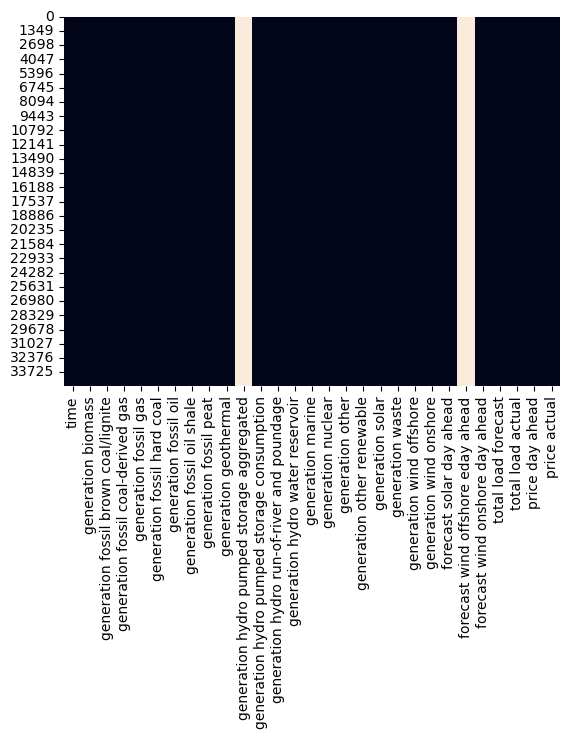

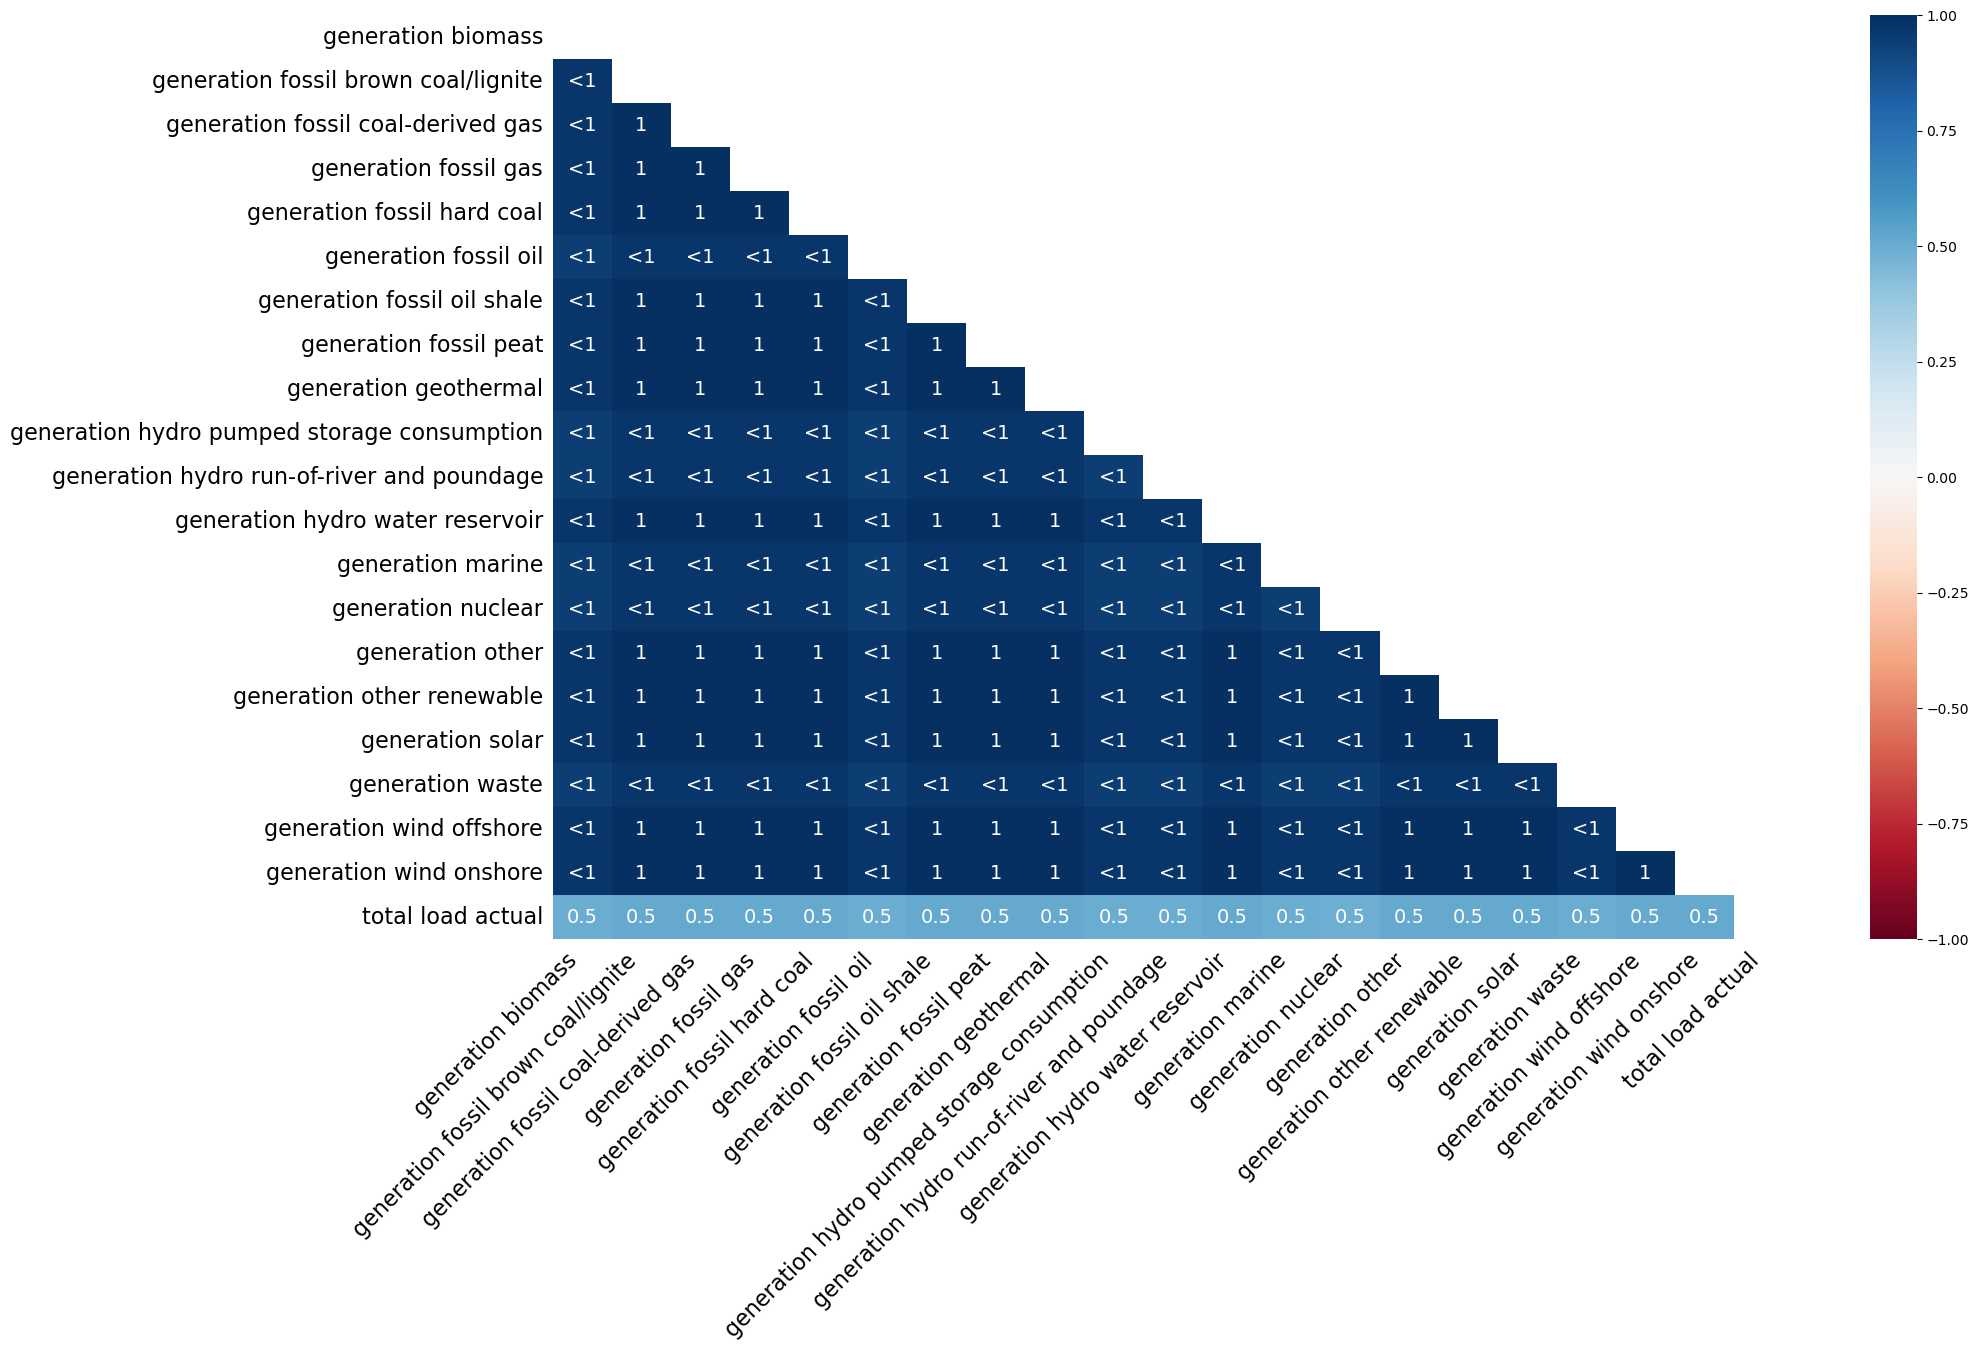

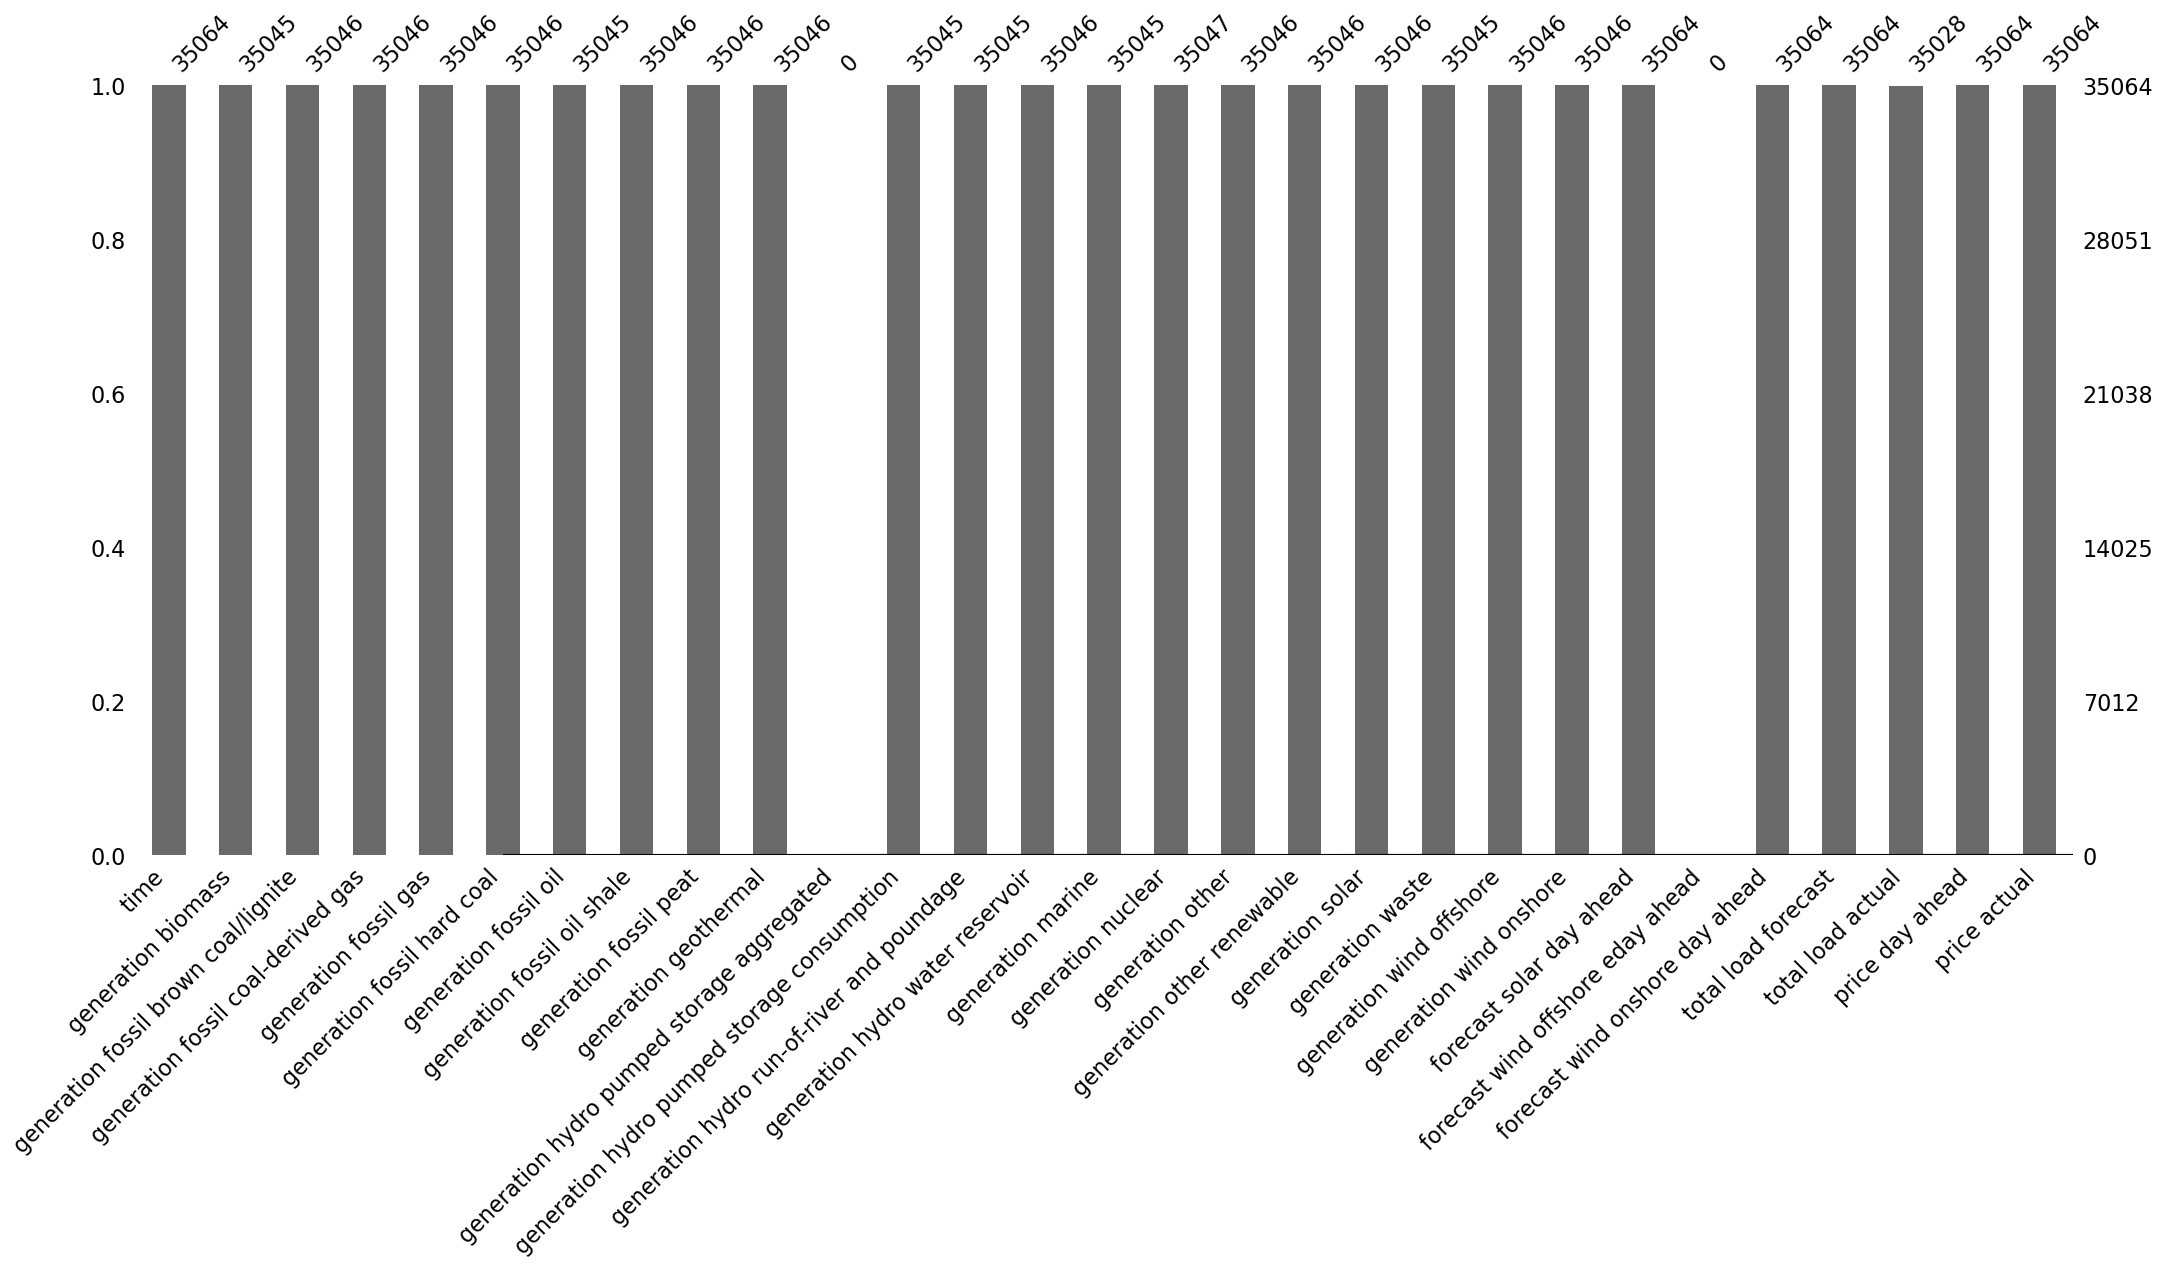

null_val  percent_null  \
generation hydro pumped storage aggregated      35064       100.000   
forecast wind offshore eday ahead               35064       100.000   
total load actual                                  36         0.103   
generation waste                                   19         0.054   
generation biomass                                 19         0.054   
generation hydro pumped storage consumption        19         0.054   
generation marine                                  19         0.054   
generation hydro run-of-river and poundage         19         0.054   
generation fossil oil                              19         0.054   
generation fossil peat                             18         0.051   
generation fossil brown coal/lignite               18         0.051   
generation wind onshore                            18         0.051   
generation wind offshore                           18         0.051   
generation fossil coal-derived gas                 18         0.051   
generation solar                                   18         0.051   
generation other renewable                         18         0.051   
generation fossil oil shale                        18         0.051   
generation fossil gas                              18         0.051   
generation hydro water reservoir                   18         0.051   
generation fossil hard coal                        18         0.051   
generation geothermal                              18         0.051   
generation other                                   18         0.051   
generation nuclear                                 17         0.048   
total load forecast                                 0         0.000   
price day ahead                                     0         0.000   
time                                                0         0.000   
forecast wind onshore day ahead                     0         0.000   
forecast solar day ahead                            0         0.000   
price actual                                        0         0.000   

                                             zero_value  total_percent  
generation hydro pumped storage aggregated            0        100.000  
forecast wind offshore eday ahead                     0        100.000  
total load actual                                     0          0.103  
generation waste                                      3          0.063  
generation biomass                                    4          0.066  
generation hydro pumped storage consumption       12607         36.008  
generation marine                                 35045        100.000  
generation hydro run-of-river and poundage            3          0.063  
generation fossil oil                                 3          0.063  
generation fossil peat                            35046        100.000  
generation fossil brown coal/lignite              10517         30.045  
generation wind onshore                               3          0.060  
generation wind offshore                          35046        100.000  
generation fossil coal-derived gas                35046        100.000  
generation solar                                      3          0.060  
generation other renewable                            3          0.060  
generation fossil oil shale                       35046        100.000  
generation fossil gas                                 1          0.054  
generation hydro water reservoir                      3          0.060  
generation fossil hard coal                           3          0.060  
generation geothermal                             35046        100.000  
generation other                                      4          0.063  
generation nuclear                                    3          0.057  
total load forecast                                   0          0.000  
price day ahead                                       0          0.000  
time            

In [10]:
explore.null_values()

**Observation**

- From above analysis, we can conclude that the missing in :

    -  column generation hydro pumped storage aggregated and forecast wind offshore eday ahead are at random. The percent of missing in these columns are high.So, we will drop these columns later on 
    - the rest of columns are completely at random. we will drop the missing in the rows as the percent of missing in these columns is acceptable. so, we will perserve these columns

## Check Duplication

----------
-----------

In [12]:
explore.duplicated_values()

Number of duplicated rows 0


**Observations**
- Thanks to Allah, there is no duplication in our data 

## Check redundant features 
---------
----------

In [4]:
explore.redundant_features()

['forecast solar day ahead', 'forecast wind onshore day ahead', 'total load actual']


/kaggle/input/eda-time-series/EDA.py:103: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_matrix = self.df.corr().abs()


generation biomass  \
generation biomass                                          NaN   
generation fossil brown coal/lignite                        NaN   
generation fossil coal-derived gas                          NaN   
generation fossil gas                                       NaN   
generation fossil hard coal                                 NaN   
generation fossil oil                                       NaN   
generation fossil oil shale                                 NaN   
generation fossil peat                                      NaN   
generation geothermal                                       NaN   
generation hydro pumped storage aggregated                  NaN   
generation hydro pumped storage consumption                 NaN   
generation hydro run-of-river and poundage                  NaN   
generation hydro water reservoir                            NaN   
generation marine                                           NaN   
generation nuclear                                          NaN   
generation other                                            NaN   
generation other renewable                                  NaN   
generation solar                                            NaN   
generation waste                                            NaN   
generation wind offshore                                    NaN   
generation wind onshore                                     NaN   
forecast solar day ahead                                    NaN   
forecast wind offshore eday ahead                           NaN   
forecast wind onshore day ahead                             NaN   
total load forecast                                         NaN   
total load actual                                           NaN   
price day ahead                                             NaN   
price actual                                                NaN   

                                             generation fossil brown coal/lignite  \
generation biomass                                                       0.229809   
generation fossil brown coal/lignite                                          NaN   
generation fossil coal-derived gas                                            NaN   
generation fossil gas                                                         NaN   
generation fossil hard coal                                                   NaN   
generation fossil oil                                                         NaN   
generation fossil oil shale                                                   NaN   
generation fossil peat                                                        NaN   
generation geothermal                                                         NaN   
generation hydro pumped storage aggregated                                    NaN   
generation hydro pumped storage consumption                                   NaN   
generation hydro run-of-river and poundage                                    NaN   
generation hydro water reservoir                                              NaN   
generation marine                                                             NaN   
generation nuclear                                                            NaN   
generation other                                                              NaN   
generation other renewable                                                    NaN   
generation solar                                                              NaN   
generation waste                                                              NaN   
generation wind offshore                                                      NaN   
generation wind onshore                                                       NaN   
forecast solar day ahead                                                      NaN   
forecast wind offshore eday ahead                                             NaN   
forecast wind onshore day ahead                              

**Observations**

- As you can see, there are about 3 columns (['forecast solar day ahead', 'forecast wind onshore day ahead', 'total load actual']) are highly correlated with other columns. So, it's better to remove them as it can potentially improve the performance of your model by reducing multicollinearity, which can lead to more stable and accurate estimates of the model coefficients.


# Prepare Data 
------------
----------
- Drop generation hydro pumped storage aggregated and forecast wind offshore eday ahead
- Drop null values 
- Drop Constant Columns 

In [5]:
explore.drop_col(['generation hydro pumped storage aggregated' , 'forecast wind offshore eday ahead'] , options = True)
print("Shape of data after removing null values" , df.shape)

time  generation biomass  \
0      2015-01-01 00:00:00+01:00               447.0   
1      2015-01-01 01:00:00+01:00               449.0   
2      2015-01-01 02:00:00+01:00               448.0   
3      2015-01-01 03:00:00+01:00               438.0   
4      2015-01-01 04:00:00+01:00               428.0   
...                          ...                 ...   
35059  2018-12-31 19:00:00+01:00               297.0   
35060  2018-12-31 20:00:00+01:00               296.0   
35061  2018-12-31 21:00:00+01:00               292.0   
35062  2018-12-31 22:00:00+01:00               293.0   
35063  2018-12-31 23:00:00+01:00               290.0   

       generation fossil brown coal/lignite  \
0                                     329.0   
1                                     328.0   
2                                     323.0   
3                                     254.0   
4                                     187.0   
...                                     ...   
35059                                   0.0   
35060                                   0.0   
35061                                   0.0   
35062                                   0.0   
35063                                   0.0   

       generation fossil coal-derived gas  generation fossil gas  \
0                                     0.0                 4844.0   
1                                     0.0                 5196.0   
2                                     0.0                 4857.0   
3                                     0.0                 4314.0   
4                                     0.0                 4130.0   
...                                   ...                    ...   
35059                                 0.0                 7634.0   
35060                                 0.0                 7241.0   
35061                                 0.0                 7025.0   
35062                                 0.0                 6562.0   
35063                                 0.0                 6926.0   

       generation fossil hard coal  generation fossil oil  \
0                           4821.0                  162.0   
1                           4755.0                  158.0   
2                           4581.0                  157.0   
3                           4131.0                  160.0   
4                           3840.0                  156.0   
...                            ...                    ...   
35059                       2628.0                  178.0   
35060                       2566.0                  174.0   
35061                       2422.0                  168.0   
35062                       2293.0                  163.0   
35063                       2166.0                  163.0   

       generation fossil oil shale  generation fossil peat  \
0                              0.0                     0.0   
1                              0.0                     0.0   
2                              0.0                     0.0   
3                              0.0                     0.0   
4                              0.0                     0.0   
...                            ...                     ...   
35059                          0.0                     0.0   
35060                          0.0                     0.0   
35061                          0.0                     0.0   
35062                          0.0                     0.0   
35063                          0.0                     0.0   

       generation geothermal  generation hydro pumped storage consumption  \
0                        0.0                                        863.0   
1                        0.0                                        920.0   
2                        0.0                                       1164.0   
3                        0.0                                       1503.0   
4                        0.0                                       1826.0   
...                      ...     

Shape of data after removing null values (35040, 24)


In [6]:
# Check if there are constant columns in the data after droping null values
explore = EDA(df)
constant_features = explore.constant_columns()
print("Constant Features are :" ,constant_features)
# Drop constant Features 
explore.drop_col(constant_features)
print("Shape of data after dropping null values and constant features " , df.shape)

Constant Features are : ['generation fossil coal-derived gas', 'generation fossil oil shale', 'generation fossil peat', 'generation geothermal', 'generation marine', 'generation wind offshore']


time  generation biomass  \
0      2015-01-01 00:00:00+01:00               447.0   
1      2015-01-01 01:00:00+01:00               449.0   
2      2015-01-01 02:00:00+01:00               448.0   
3      2015-01-01 03:00:00+01:00               438.0   
4      2015-01-01 04:00:00+01:00               428.0   
...                          ...                 ...   
35059  2018-12-31 19:00:00+01:00               297.0   
35060  2018-12-31 20:00:00+01:00               296.0   
35061  2018-12-31 21:00:00+01:00               292.0   
35062  2018-12-31 22:00:00+01:00               293.0   
35063  2018-12-31 23:00:00+01:00               290.0   

       generation fossil brown coal/lignite  generation fossil gas  \
0                                     329.0                 4844.0   
1                                     328.0                 5196.0   
2                                     323.0                 4857.0   
3                                     254.0                 4314.0   
4                                     187.0                 4130.0   
...                                     ...                    ...   
35059                                   0.0                 7634.0   
35060                                   0.0                 7241.0   
35061                                   0.0                 7025.0   
35062                                   0.0                 6562.0   
35063                                   0.0                 6926.0   

       generation fossil hard coal  generation fossil oil  \
0                           4821.0                  162.0   
1                           4755.0                  158.0   
2                           4581.0                  157.0   
3                           4131.0                  160.0   
4                           3840.0                  156.0   
...                            ...                    ...   
35059                       2628.0                  178.0   
35060                       2566.0                  174.0   
35061                       2422.0                  168.0   
35062                       2293.0                  163.0   
35063                       2166.0                  163.0   

       generation hydro pumped storage consumption  \
0                                            863.0   
1                                            920.0   
2                                           1164.0   
3                                           1503.0   
4                                           1826.0   
...                                            ...   
35059                                          1.0   
35060                                          1.0   
35061                                         50.0   
35062                                        108.0   
35063                                        108.0   

       generation hydro run-of-river and poundage  \
0                                          1051.0   
1                                          1009.0   
2                                           973.0   
3                                           949.0   
4                                           953.0   
...                                           ...   
35059                                      1135.0   
35060                                      1172.0   
35061                                      1148.0   
35062                                      1128.0   
35063                                      1069.0   

       generation hydro water reservoir  generation nuclear  generation other  \
0                                1899.0              7096.0              43.0   
1                                1658.0              7096.0              43.0   
2                                1371.0              7099.0              43.0   
3                                 779.0              7098.0              43.0   
4                                 720.0              7097.0              43.0   
...      

Shape of data after dropping null values and constant features  (35040, 18)


In [10]:
df.columns.rename


Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore', 'total load forecast',
       'price day ahead', 'price actual'],
      dtype='object')

## Feature Selection
-----------
-----------
- Apply PCA technique to reduce the dimentionality.It works by identifying the most important features, or principal components, in the data and projecting the data onto those components to create a lower-dimensional representation.
- we set n_components=0.99, it will choose the minimum number of principal components required to explain 99% of the variance in the data.


In [7]:
# Apply pca to reduce dimentionality
pca = PCA(n_components=0.99)
pca.fit(df.drop(['time'] , axis = 1))
features_pca = pca.transform(df.drop(['time'] , axis = 1))
print("Shape of data after applying pca " , features_pca.shape)
df_features_pca = pd.DataFrame(features_pca)
df.reset_index(inplace = True)
df_cleaned = pd.concat([df_features_pca , df[['time']]], axis = 1 )
print("shape of final data", df_cleaned.shape)
df_cleaned.sample(5)

PCA(n_components=0.99)

Shape of data after applying pca  (35040, 7)
shape of final data (35040, 8)


0            1            2            3            4  \
32308 -7359.636656 -5674.170768   235.005657    26.515712  -965.165273   
2593  -3140.520764 -2601.682589  2167.812511 -3100.871354   707.238871   
26837 -4559.417638 -2714.457961  -859.381187   314.385103   116.793946   
27847 -1996.218597 -4171.169663  1052.509738  1351.471986  -563.561812   
21755  8379.768953 -3427.136156  -823.264433 -1989.483436  1965.473813   

                 5           6                       time  
32308 -1086.297909   15.245311  2018-09-09 05:00:00+02:00  
2593    170.156740 -697.567647  2015-04-19 14:00:00+02:00  
26837 -1228.142977  -17.083954  2018-01-24 04:00:00+01:00  
27847  -316.445046  600.265051  2018-03-07 06:00:00+01:00  
21755  1028.034531  236.275674  2017-06-26 11:00:00+02:00

**Observation**

- Our original data had shape (35040, 18) (35040 samples with 18 features), after applying PCA with n_components=0.99, the new data will have shape (35040, 7) because the PCA algorithm has reduced the dimensionality of the data by selecting the top 7 principal components that explain 99% of the variance in the data.



## Covert date column to %Y-%m-%d %H:%M:%S format
------------
----------


In [12]:
#Rename time column to date column
df_cleaned.rename(columns = {'time' : 'date'} ,inplace = True )

print("Type of date column " , df_cleaned['date'].dtype)

df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])
# assume the timezone of the datetime values is 'US/Eastern'
eastern = pytz.timezone('US/Eastern')

# convert all datetime values to UTC timezone
df_cleaned['date'] = df_cleaned['date'].apply(lambda x: x.astimezone(pytz.utc) if x.tzinfo is not None else eastern.localize(x).astimezone(pytz.utc))

# convert date column to datetime64 format
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# assume your datetime column is called 'date'
df_cleaned['date'] = pd.to_datetime(df_cleaned['date']).dt.tz_convert('UTC')

# convert date column to datetime64 format
df_cleaned['date'] = df_cleaned['date'].dt.to_pydatetime().astype('datetime64[ns]')

df_cleaned['date'] = pd.to_datetime(df_cleaned['date'], format='%Y-%m-%d %H:%M:%S')

print("Type of date column " , df_cleaned['date'].dtype)

Type of date column  object
Type of date column  datetime64[ns]


In [13]:
df_cleaned.to_csv("Energy_consumption_df_kaggle_.csv" , index = False )

# Explore All Data that we will use 
----------
----------


In [3]:
ECE = pd.read_csv("/kaggle/input/daproje/Energy_consumption_df_kaggle_.csv" , index_col = 'date' , parse_dates =['date'])
ETTH1 = pd.read_csv("/kaggle/input/daproje/ETTh1.csv" , index_col = 'date' , parse_dates =['date'])
ETTH2 = pd.read_csv("/kaggle/input/daproje/ETTh2.csv" , index_col = 'date' , parse_dates =['date'])
ETTM1 = pd.read_csv("/kaggle/input/daproje/ETTm1.csv" , index_col = 'date' , parse_dates =['date'])
# read data and  parse_dates parameter allows Pandas to automatically convert these strings into Python's datetime objects, which can then be used for analysis or visualization.
daily_climate_df_train = pd.read_csv('/kaggle/input/daily-climate-time-series-data/DailyDelhiClimateTrain.csv', index_col = 'date', parse_dates = ['date'] )
daily_climate_df_test = pd.read_csv('/kaggle/input/daily-climate-time-series-data/DailyDelhiClimateTest.csv', index_col = 'date', parse_dates = ['date'] )
DC = pd.concat([daily_climate_df_test , daily_climate_df_train] , axis = 0 )

#----------------------------------------------------------------------------------------
#------------------------------------------ ECE Data ^_^ --------------------------------
#----------------------------------------------------------------------------------------


<Axes: xlabel='date'>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'ECE')

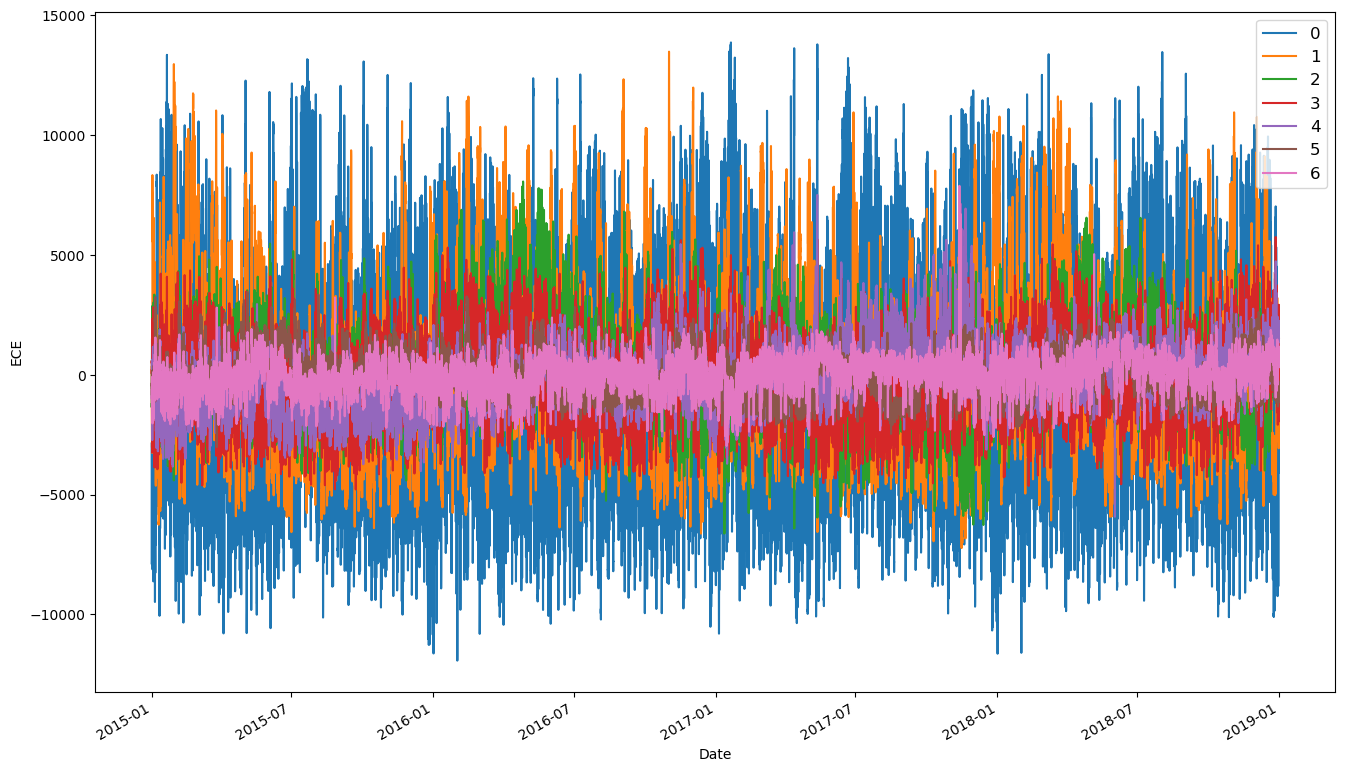

#----------------------------------------------------------------------------------------
#------------------------------------------ ETTH1 Data ^_^ --------------------------------
#----------------------------------------------------------------------------------------


<Axes: xlabel='date'>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'ETTH1')

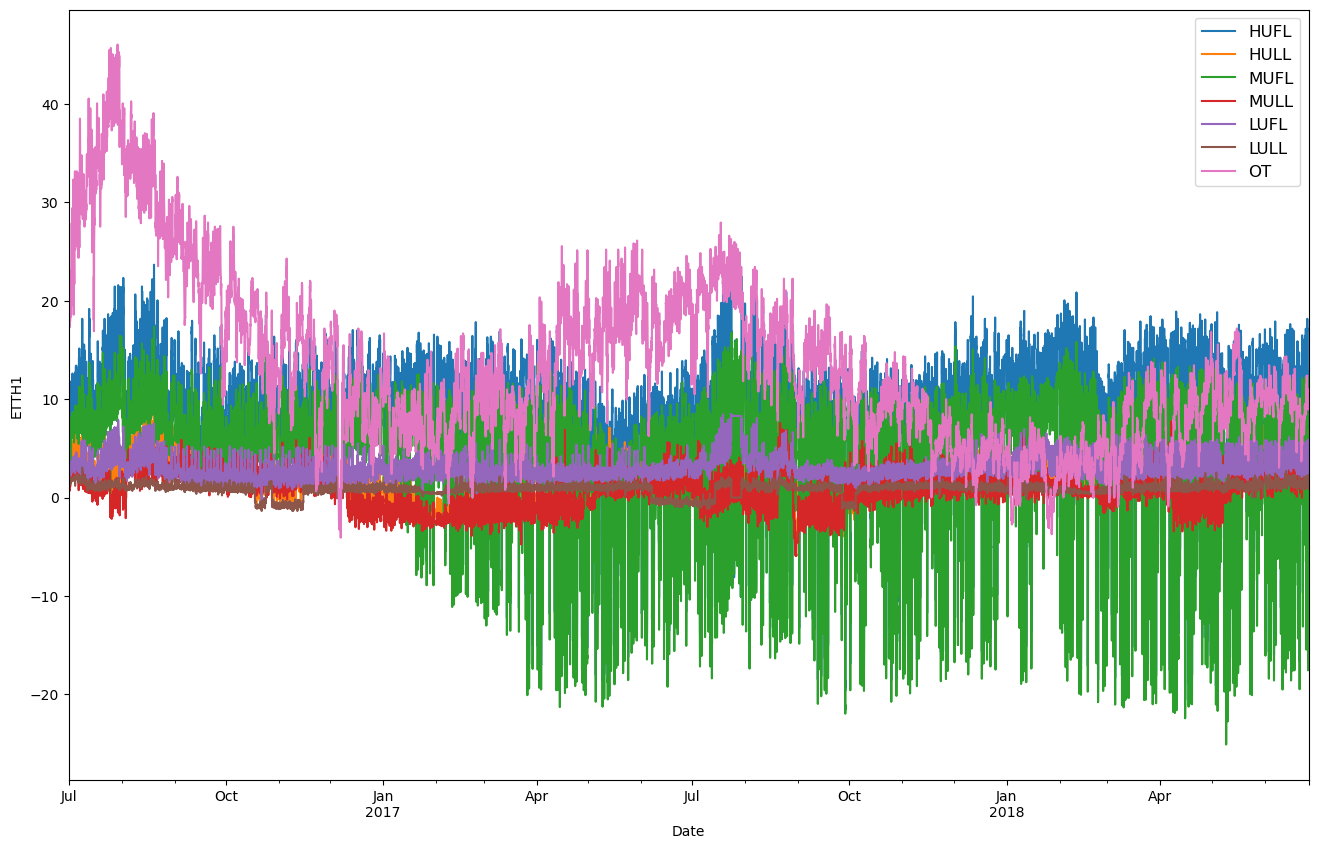

#----------------------------------------------------------------------------------------
#------------------------------------------ ETTH2 Data ^_^ --------------------------------
#----------------------------------------------------------------------------------------


<Axes: xlabel='date'>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'ETTH2')

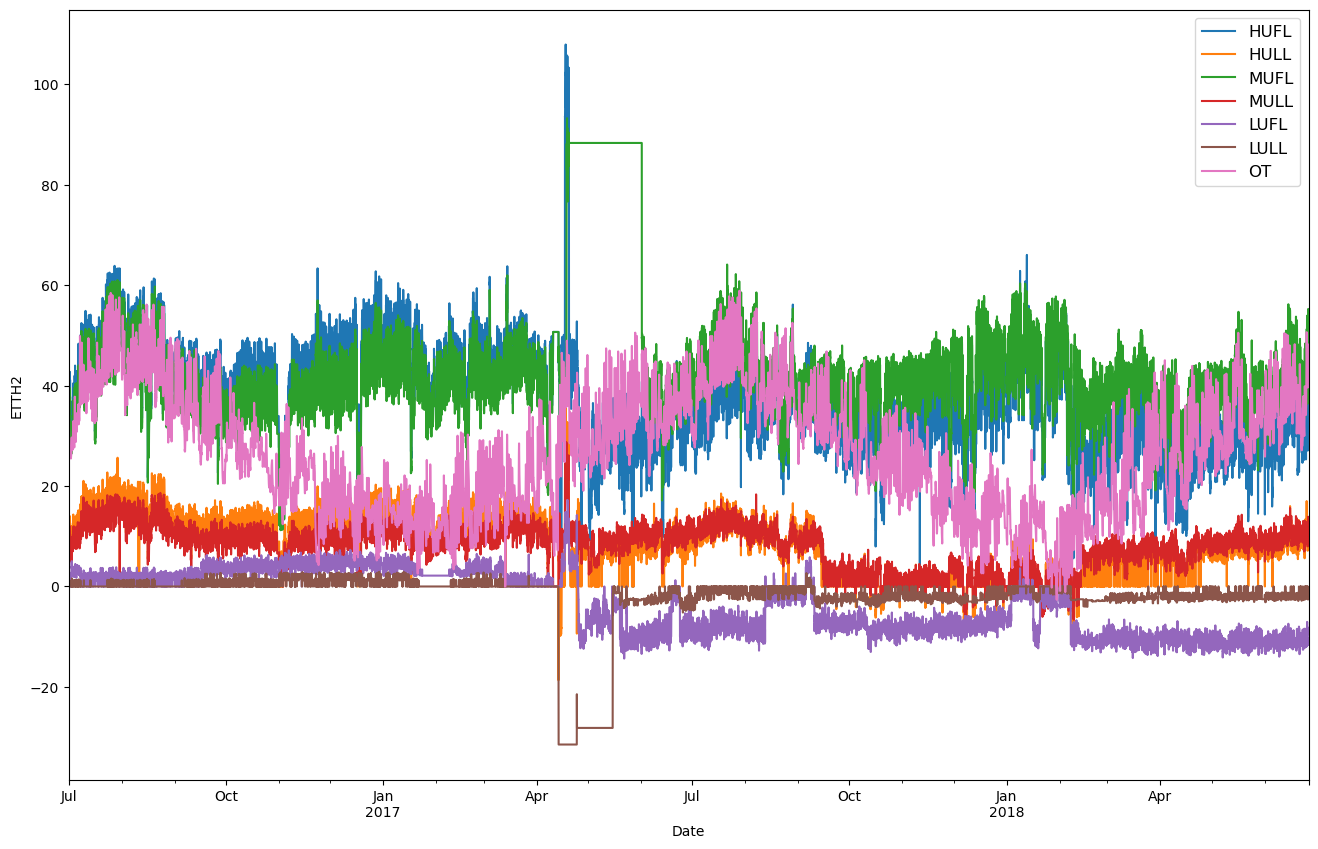

#----------------------------------------------------------------------------------------
#------------------------------------------ ETTM1 Data ^_^ --------------------------------
#----------------------------------------------------------------------------------------


<Axes: xlabel='date'>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'ETTM1')

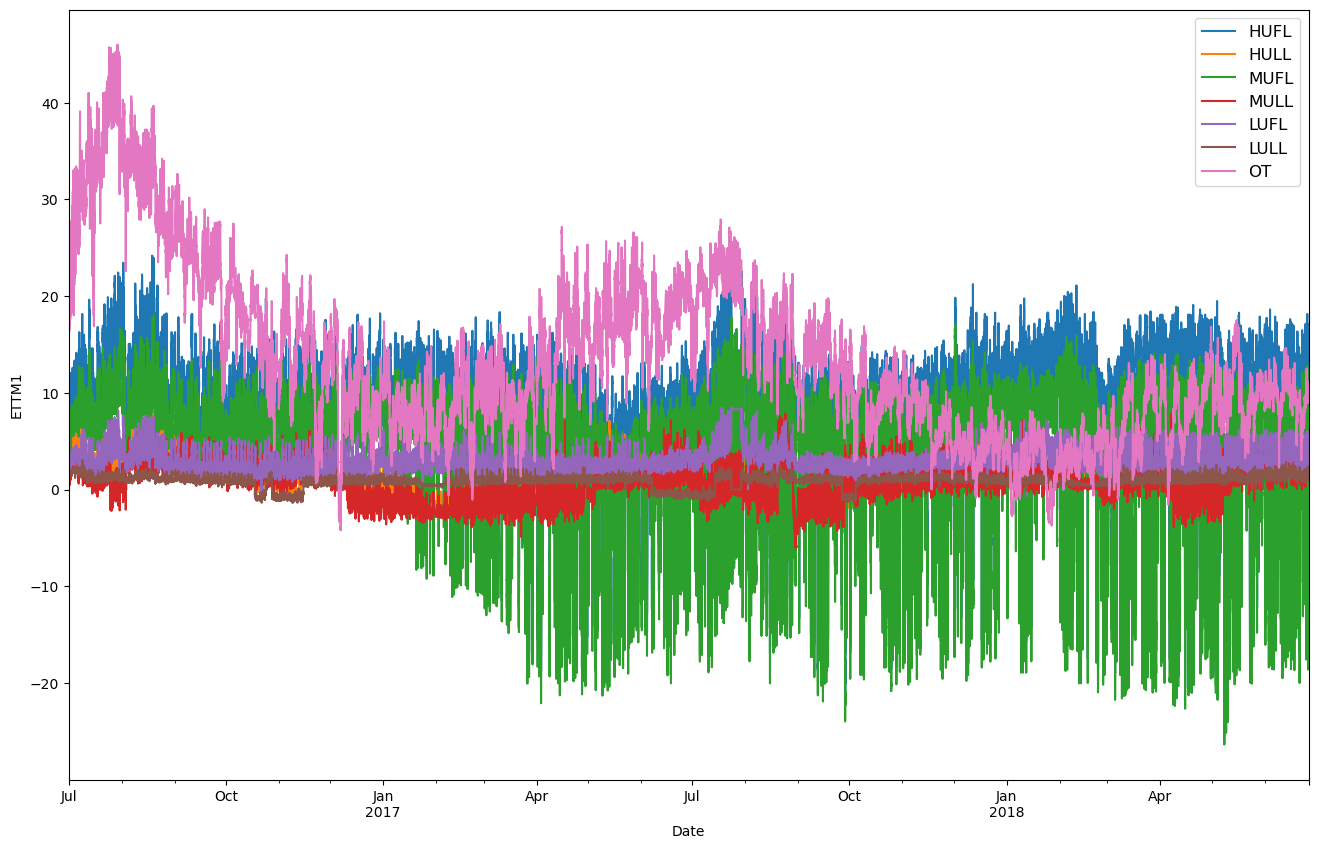

#----------------------------------------------------------------------------------------
#------------------------------------------ DC Data ^_^ --------------------------------
#----------------------------------------------------------------------------------------


<Axes: xlabel='date'>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Dialy Climate')

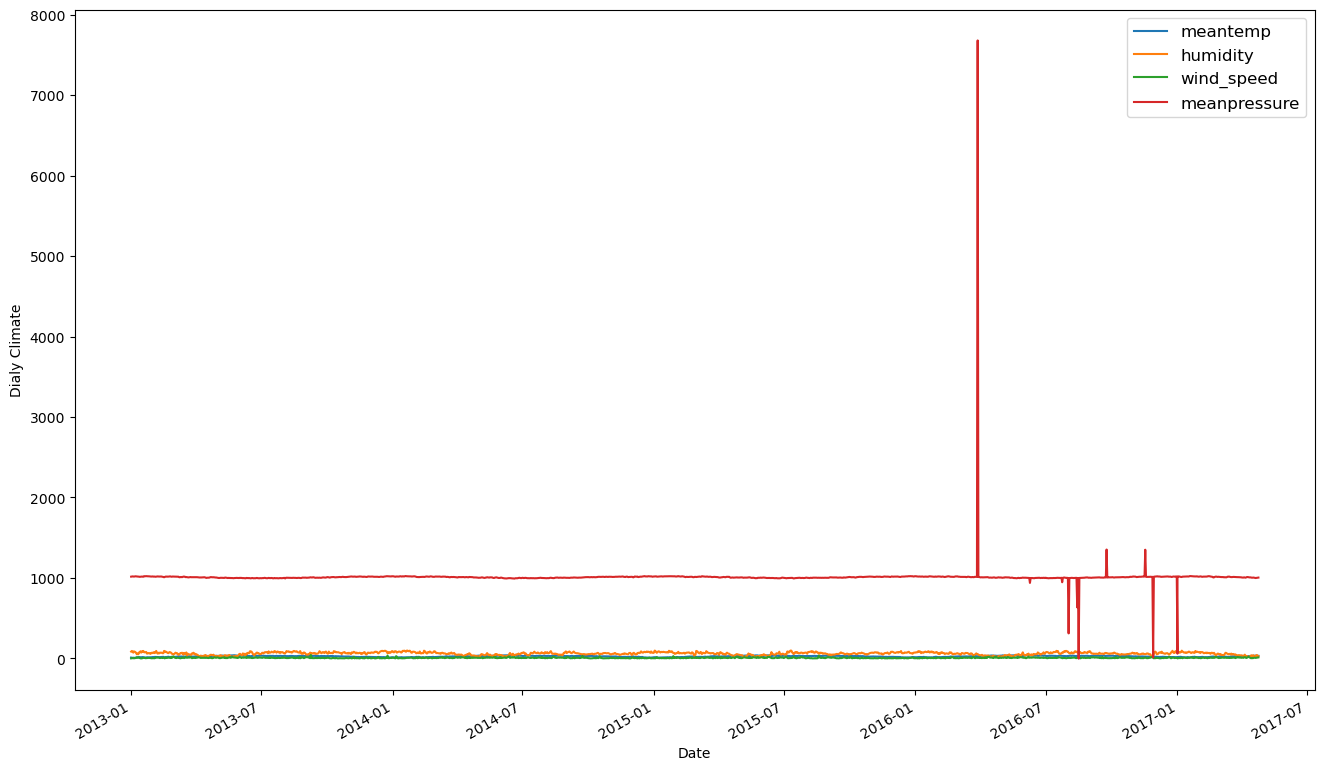

In [7]:
print('#----------------------------------------------------------------------------------------')
print('#------------------------------------------ ECE Data ^_^ --------------------------------')
print('#----------------------------------------------------------------------------------------')

ECE.plot(figsize=(16, 10))
plt.legend(fontsize="large")
plt.xlabel("Date")
plt.ylabel("ECE");
plt.show()
print('#----------------------------------------------------------------------------------------')
print('#------------------------------------------ ETTH1 Data ^_^ --------------------------------')
print('#----------------------------------------------------------------------------------------')

ETTH1.plot(figsize=(16, 10))
plt.legend(fontsize="large")
plt.xlabel("Date")
plt.ylabel("ETTH1");
plt.show()

print('#----------------------------------------------------------------------------------------')
print('#------------------------------------------ ETTH2 Data ^_^ --------------------------------')
print('#----------------------------------------------------------------------------------------')

ETTH2.plot(figsize=(16, 10))
plt.legend(fontsize="large")
plt.xlabel("Date")
plt.ylabel("ETTH2");
plt.show()

print('#----------------------------------------------------------------------------------------')
print('#------------------------------------------ ETTM1 Data ^_^ --------------------------------')
print('#----------------------------------------------------------------------------------------')

ETTM1.plot(figsize=(16, 10))
plt.legend(fontsize="large")
plt.xlabel("Date")
plt.ylabel("ETTM1");
plt.show()


print('#----------------------------------------------------------------------------------------')
print('#------------------------------------------ DC Data ^_^ --------------------------------')
print('#----------------------------------------------------------------------------------------')

DC.plot(figsize=(16, 10))
plt.legend(fontsize="large")
plt.xlabel("Date")
plt.ylabel("Dialy Climate");
plt.show()




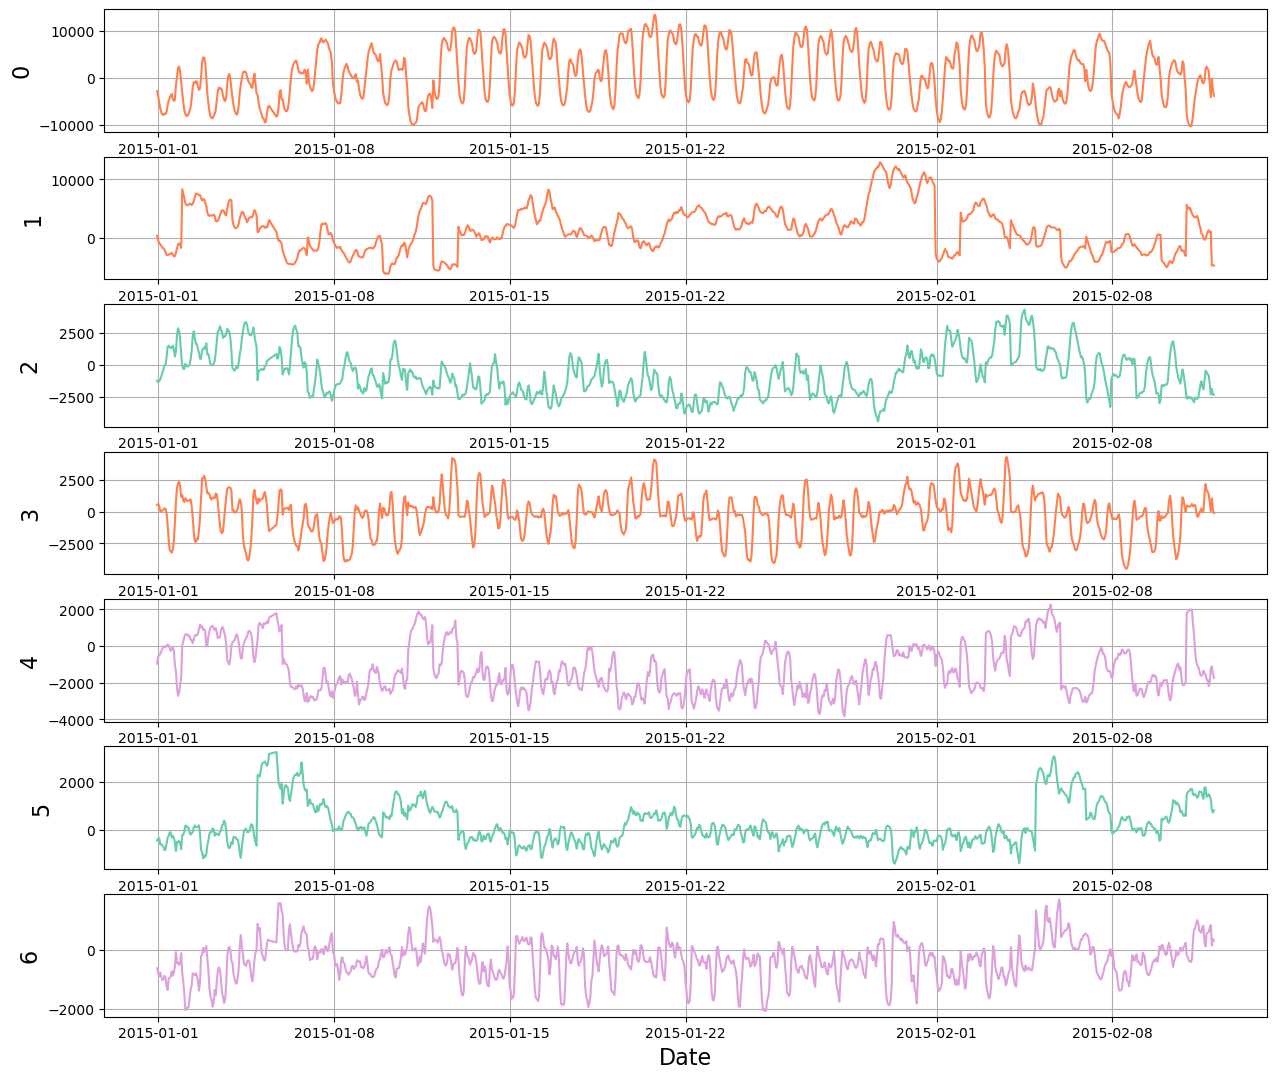

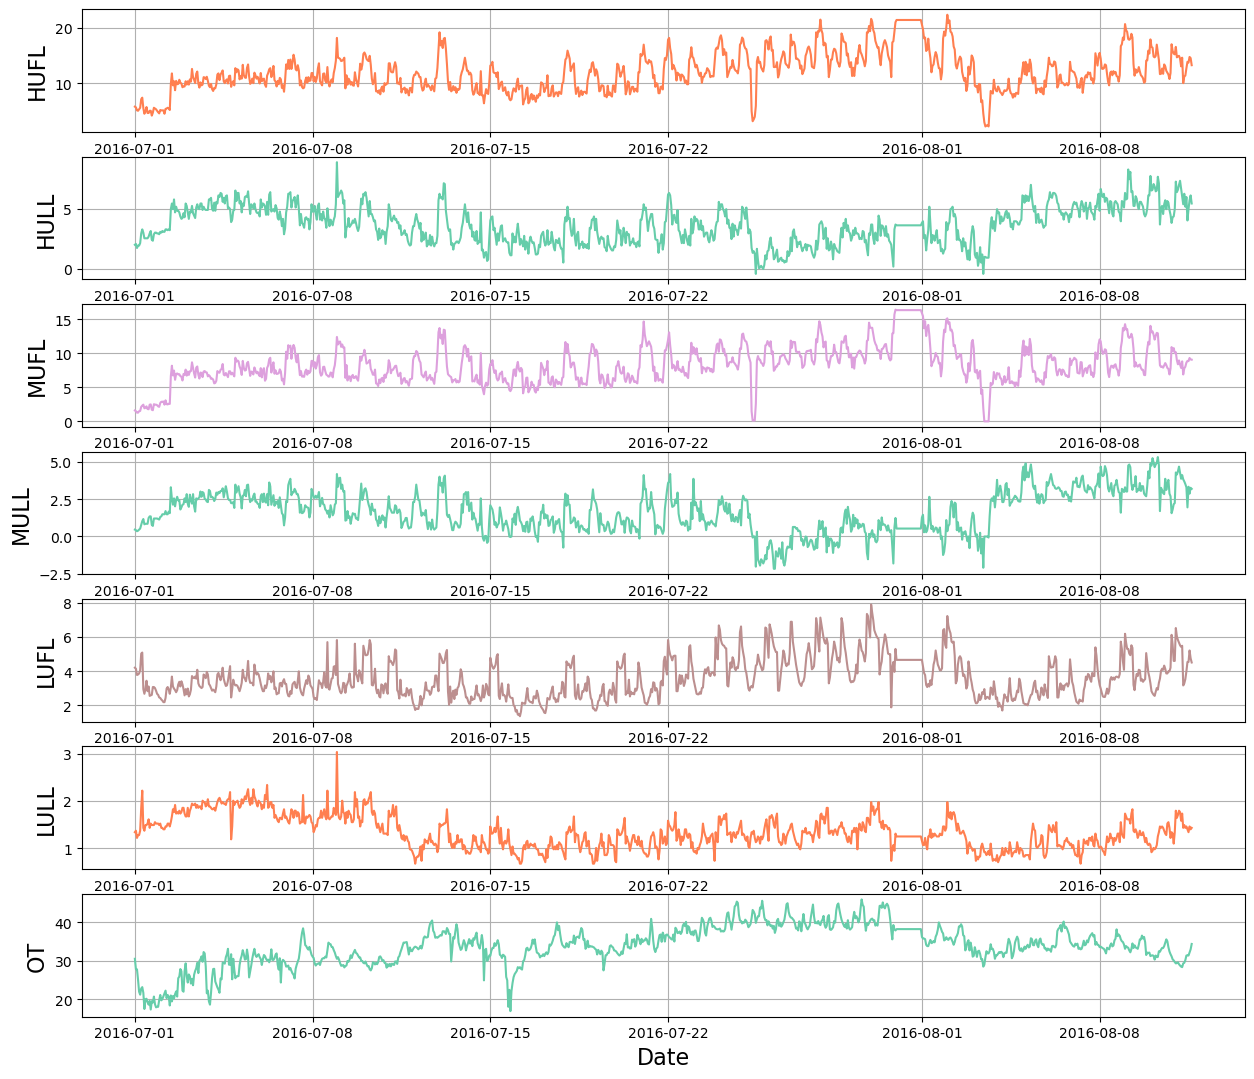

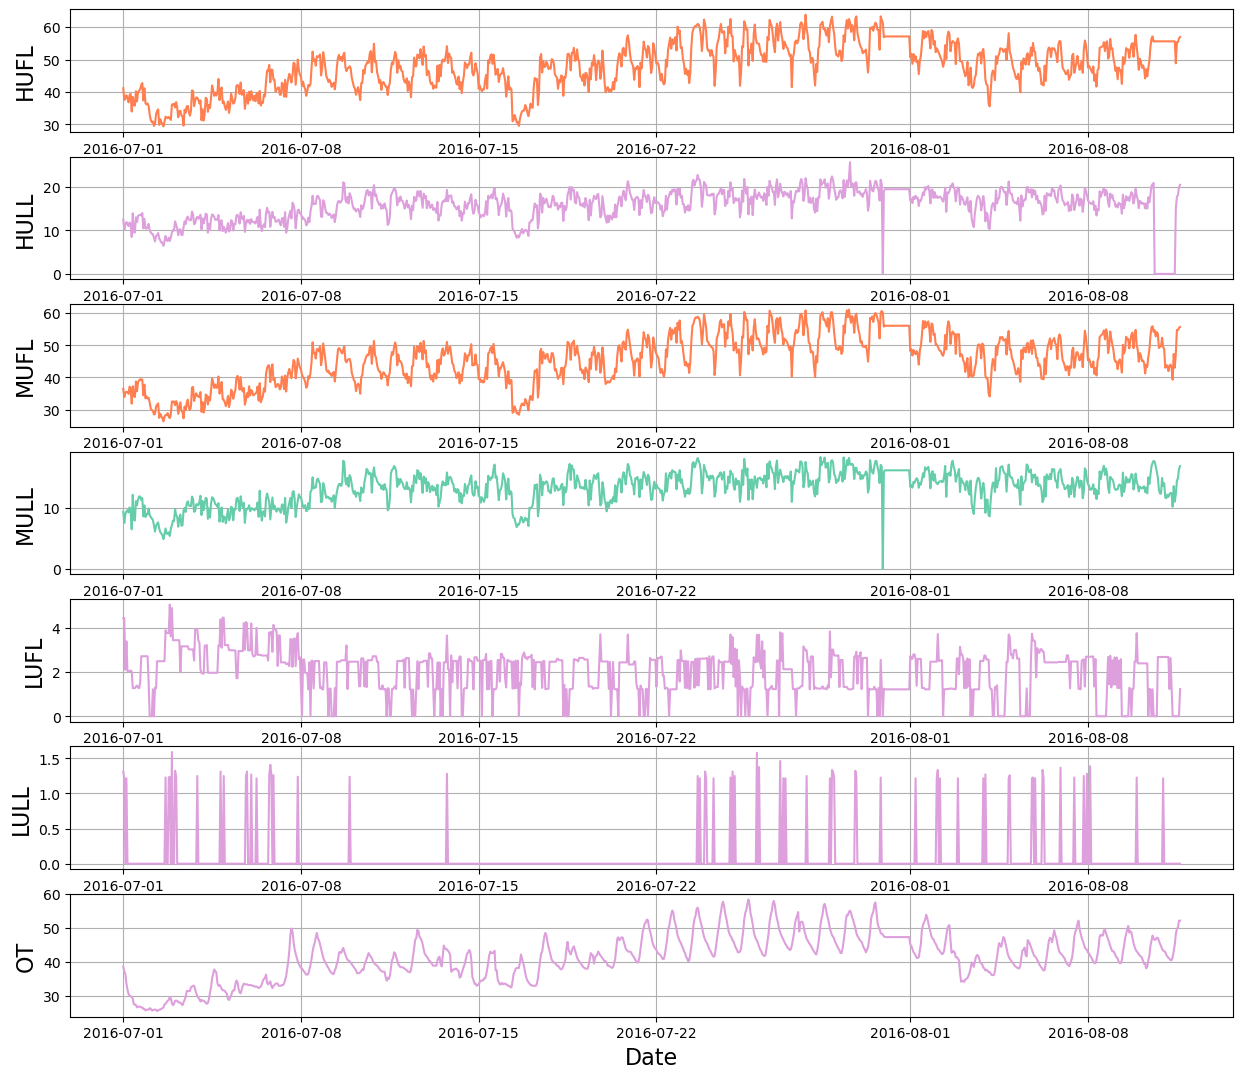

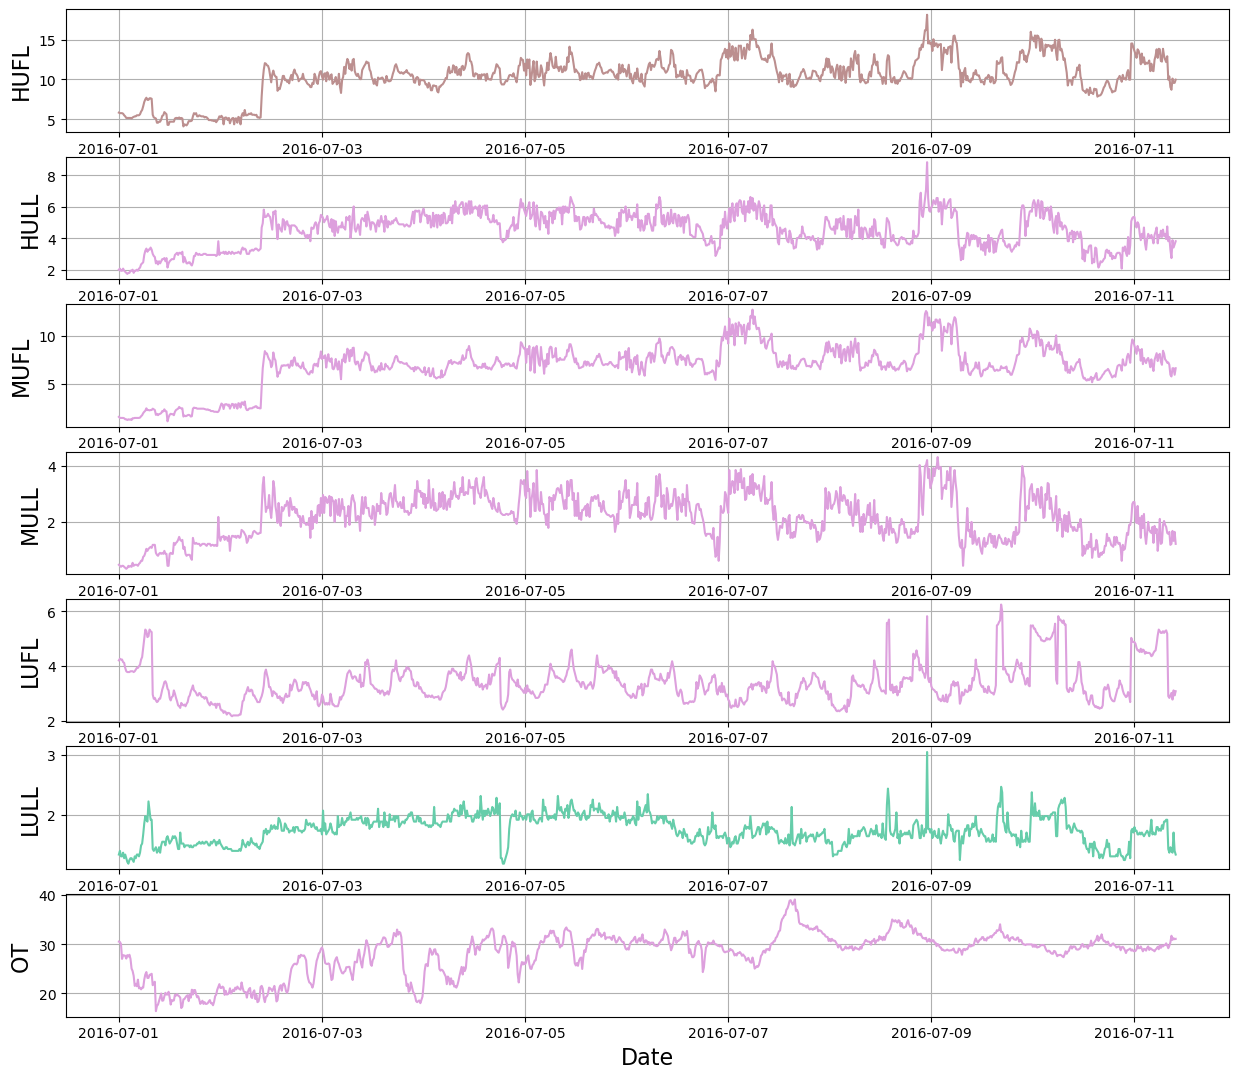

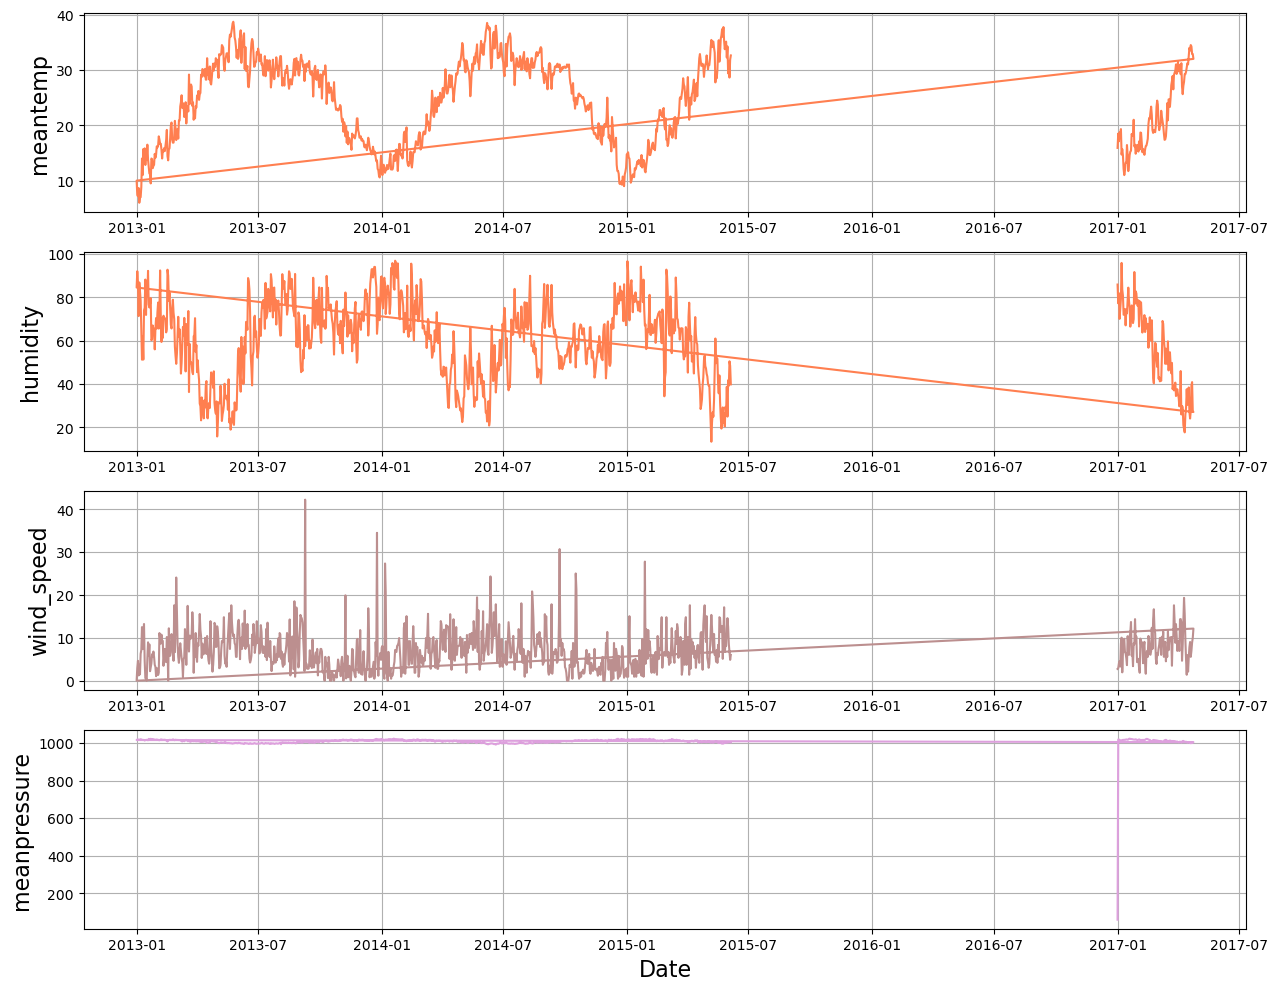

In [8]:
#----------------------------------------------------------------------------------------
#'''                                           ECE Data ^_^                   '''
#--------------------------------------------------------------------------------------------
EDA(ECE.iloc[:1000 ,:]).visualize_features_vs_Date()
#----------------------------------------------------------------------------------------
#'''                                           ETTH1 Data ^_^                    '''
#--------------------------------------------------------------------------------------------

EDA(ETTH1.iloc[:1000 ,:]).visualize_features_vs_Date()
#----------------------------------------------------------------------------------------
#'''                                            ETTH2 Data  ^_^                          '''
#--------------------------------------------------------------------------------------------
EDA(ETTH2.iloc[:1000 ,:]).visualize_features_vs_Date()
#----------------------------------------------------------------------------------------
#'''                                             ETTM1 Data ^_^                          '''
#--------------------------------------------------------------------------------------------

EDA(ETTM1.iloc[:1000 ,:]).visualize_features_vs_Date()
#----------------------------------------------------------------------------------------
#'''                                             Daily Climate Data ^_^                          '''
#--------------------------------------------------------------------------------------------

EDA(DC.iloc[:1000 ,:]).visualize_features_vs_Date()

## Describe Data
------------
----------

In [9]:
#----------------------------------------------------------------------------------------
#'''                                           ECE Data ^_^                   '''
#--------------------------------------------------------------------------------------------
print("########################### Summary of ECE data #####################################")
ECE_desc = EDA(ECE).summary()
ECE_desc


#----------------------------------------------------------------------------------------
#'''                                           Dialy Climate Data ^_^                          '''
#--------------------------------------------------------------------------------------------
print("########################### Summary of DC data #####################################")

DC_desc = EDA(DC).summary()
DC_desc


#----------------------------------------------------------------------------------------
#'''                                           ETTH1 Data ^_^                    '''
#--------------------------------------------------------------------------------------------
print("########################### Summary of ETTH1 data #####################################")

ETTH1_desc = EDA(ETTH1).summary()
ETTH1_desc
#----------------------------------------------------------------------------------------
#'''                                            ETTH2 Data  ^_^                          '''
#--------------------------------------------------------------------------------------------
print("########################### Summary of ETTH2 data #####################################")

ETTH2_desc = EDA(ETTH2).summary()
ETTH2_desc
#----------------------------------------------------------------------------------------
#'''                                             ETTM1 Data ^_^                          '''
#--------------------------------------------------------------------------------------------
print("########################### Summary of ETTM1 data #####################################")

ETTM1_desc = EDA(ETTM1).summary()
ETTM1_desc




########################### Summary of ECE data #####################################
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35040 entries, 2014-12-31 23:00:00 to 2018-12-31 22:00:00
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       35040 non-null  float64
 1   1       35040 non-null  float64
 2   2       35040 non-null  float64
 3   3       35040 non-null  float64
 4   4       35040 non-null  float64
 5   5       35040 non-null  float64
 6   6       35040 non-null  float64
dtypes: float64(7)
memory usage: 2.1 MB
None


0             1             2             3             4  \
count  3.504000e+04  3.504000e+04  3.504000e+04  3.504000e+04  3.504000e+04   
mean  -1.049864e-12 -6.312475e-13 -1.328942e-13  2.325649e-13  2.325649e-13   
std    5.000706e+03  3.518708e+03  2.053797e+03  1.670531e+03  1.360803e+03   
min   -1.192703e+04 -7.230722e+03 -6.626162e+03 -4.785763e+03 -5.925814e+03   
25%   -4.233304e+03 -2.650425e+03 -1.422322e+03 -9.207436e+02 -9.695022e+02   
50%    3.373185e+01 -6.222457e+02 -2.499096e+02  1.152979e+02  3.575713e-01   
75%    3.836765e+03  2.086939e+03  1.246675e+03  1.042922e+03  8.930055e+02   
max    1.386479e+04  1.348052e+04  8.062646e+03  5.746713e+03  7.502807e+03   

                  5             6  
count  3.504000e+04  3.504000e+04  
mean   4.169556e-13 -1.179436e-13  
std    9.188718e+02  7.128758e+02  
min   -3.017090e+03 -2.972970e+03  
25%   -6.855468e+02 -4.401006e+02  
50%   -8.990643e+01  4.464124e+01  
75%    6.378769e+02  4.914335e+02  
max    3.454113e+03  7.883676e+03

########################### Summary of DC data #####################################
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1576 entries, 2017-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1576 non-null   float64
 1   humidity      1576 non-null   float64
 2   wind_speed    1576 non-null   float64
 3   meanpressure  1576 non-null   float64
dtypes: float64(4)
memory usage: 61.6 KB
None


meantemp     humidity   wind_speed  meanpressure
count  1576.000000  1576.000000  1576.000000   1576.000000
mean     25.221918    60.445229     6.899262   1010.593178
std       7.345014    16.979994     4.510725    175.242704
min       6.000000    13.428571     0.000000     -3.041667
25%      18.500000    49.750000     3.700000   1001.875000
50%      27.166667    62.440476     6.363571   1009.055556
75%      31.142857    72.125000     9.262500   1015.200000
max      38.714286   100.000000    42.220000   7679.333333

########################### Summary of ETTH1 data #####################################
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17420 entries, 2016-07-01 00:00:00 to 2018-06-26 19:00:00
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HUFL    17420 non-null  float64
 1   HULL    17420 non-null  float64
 2   MUFL    17420 non-null  float64
 3   MULL    17420 non-null  float64
 4   LUFL    17420 non-null  float64
 5   LULL    17420 non-null  float64
 6   OT      17420 non-null  float64
dtypes: float64(7)
memory usage: 1.1 MB
None


HUFL          HULL          MUFL          MULL          LUFL  \
count  17420.000000  17420.000000  17420.000000  17420.000000  17420.000000   
mean       7.375141      2.242242      4.300239      0.881568      3.066062   
std        7.067744      2.042342      6.826978      1.809293      1.164506   
min      -22.705999     -4.756000    -25.087999     -5.934000     -1.188000   
25%        5.827000      0.737000      3.296000     -0.284000      2.315000   
50%        8.774000      2.210000      5.970000      0.959000      2.833000   
75%       11.788000      3.684000      8.635000      2.203000      3.625000   
max       23.643999     10.114000     17.341000      7.747000      8.498000   

               LULL            OT  
count  17420.000000  17420.000000  
mean       0.856932     13.324672  
std        0.599552      8.566946  
min       -1.371000     -4.080000  
25%        0.670000      6.964000  
50%        0.975000     11.396000  
75%        1.218000     18.079000  
max        3.046000     46.007000

########################### Summary of ETTH2 data #####################################
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17420 entries, 2016-07-01 00:00:00 to 2018-06-26 19:00:00
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HUFL    17420 non-null  float64
 1   HULL    17420 non-null  float64
 2   MUFL    17420 non-null  float64
 3   MULL    17420 non-null  float64
 4   LUFL    17420 non-null  float64
 5   LULL    17420 non-null  float64
 6   OT      17420 non-null  float64
dtypes: float64(7)
memory usage: 1.1 MB
None


HUFL          HULL          MUFL          MULL          LUFL  \
count  17420.000000  17420.000000  17420.000000  17420.000000  17420.000000   
mean      37.193346      8.537565     43.830356      8.322694     -3.423605   
std       10.218855      6.020442     13.056798      4.366059      6.144403   
min        0.000000    -18.680000     11.205000     -6.594000    -14.350000   
25%       30.156000      4.523000     37.394001      5.683000     -9.254000   
50%       37.193001      9.131000     41.388000      9.302000     -3.774000   
75%       44.062000     13.152000     46.078999     11.258000      2.527000   
max      107.892998     36.438999     93.230003     28.736000     17.218000   

               LULL            OT  
count  17420.000000  17420.000000  
mean      -2.085969     26.609376  
std        6.012796     11.888266  
min      -31.462000     -2.646500  
25%       -2.505000     16.469500  
50%       -1.226000     26.577000  
75%        0.000000     35.585999  
max        2.932000     58.876999

########################### Summary of ETTM1 data #####################################
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 69680 entries, 2016-07-01 00:00:00 to 2018-06-26 19:45:00
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HUFL    69680 non-null  float64
 1   HULL    69680 non-null  float64
 2   MUFL    69680 non-null  float64
 3   MULL    69680 non-null  float64
 4   LUFL    69680 non-null  float64
 5   LULL    69680 non-null  float64
 6   OT      69680 non-null  float64
dtypes: float64(7)
memory usage: 4.3 MB
None


HUFL          HULL          MUFL          MULL          LUFL  \
count  69680.000000  69680.000000  69680.000000  69680.000000  69680.000000   
mean       7.413993      2.261418      4.322226      0.896509      3.082888   
std        7.082928      2.041293      6.829189      1.807239      1.174063   
min      -23.242001     -5.693000    -26.367001     -6.041000     -1.188000   
25%        5.827000      0.804000      3.305000     -0.284000      2.315000   
50%        8.841000      2.210000      6.005000      0.959000      2.833000   
75%       11.788000      3.684000      8.635000      2.203000      3.655000   
max       24.180000     10.315000     18.087000      7.853000      8.498000   

               LULL            OT  
count  69680.000000  69680.000000  
mean       0.857907     13.320642  
std        0.600440      8.564817  
min       -1.371000     -4.221000  
25%        0.670000      6.964000  
50%        0.975000     11.396000  
75%        1.218000     18.079000  
max        3.046000     46.007000

## Statistics
----------
-----------

#### ETT Datasets
----------
----------

########################### Mean across the three datasets #####################################


<Axes: >

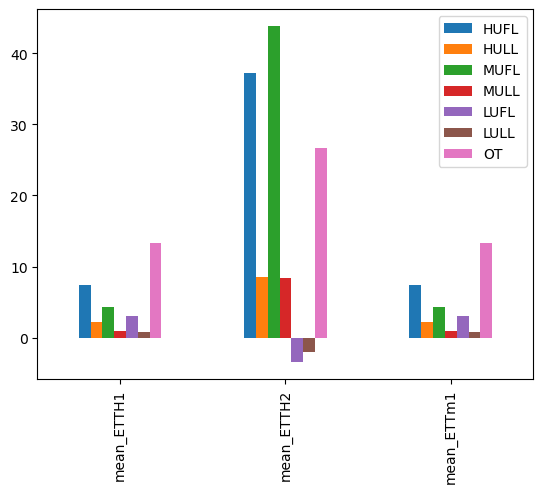

########################### Max across the three datasets #####################################


<Axes: >

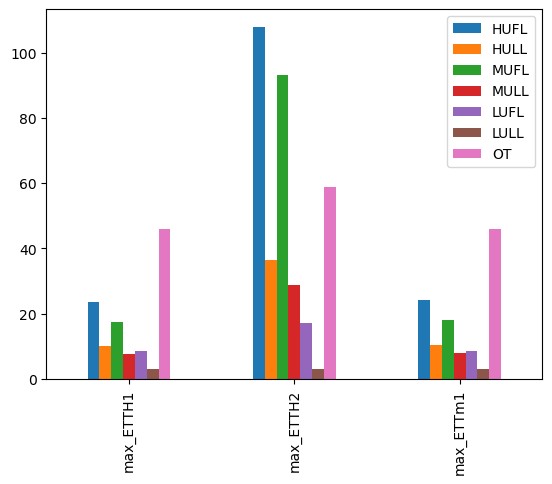

########################### Min across the three datasets #####################################


<Axes: >

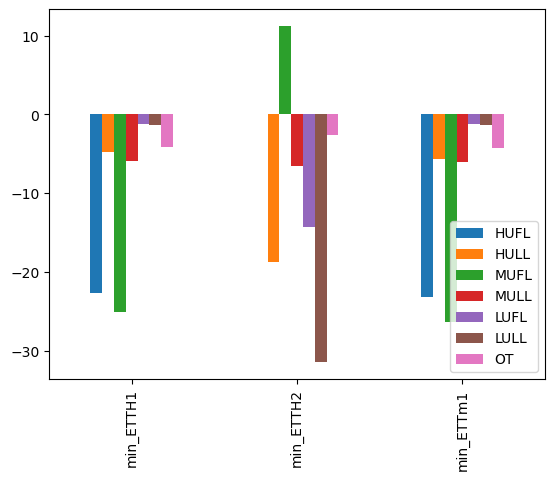

########################### Count across the three datasets #####################################


<Axes: >

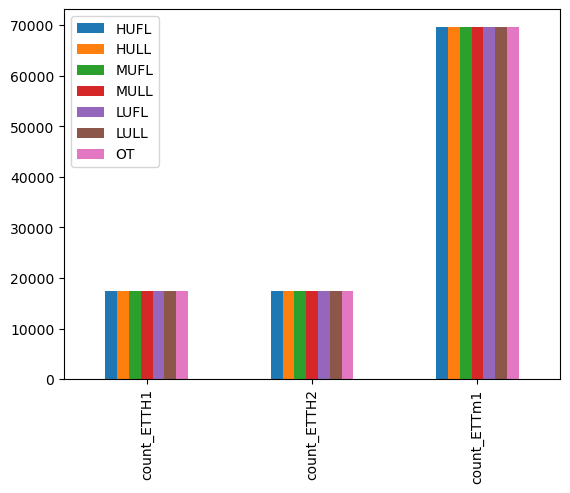

In [34]:
ETT = pd.concat([ETTH1_desc ,ETTH2_desc , ETTM1_desc] , axis = 0)
print("########################### Mean across the three datasets #####################################")
mean_ETT = ETT.loc['mean' , :]
mean_ETT.index = ['mean_ETTH1' , 'mean_ETTH2', 'mean_ETTm1']
mean_ETT.plot(kind = 'bar')
plt.show()

print("########################### Max across the three datasets #####################################")

max_ETT = ETT.loc['max' , :]
max_ETT.index = ['max_ETTH1' , 'max_ETTH2', 'max_ETTm1']
max_ETT.plot(kind = 'bar')
plt.show()
print("########################### Min across the three datasets #####################################")

min_ETT = ETT.loc['min' , :]
min_ETT.index = ['min_ETTH1' , 'min_ETTH2', 'min_ETTm1']
min_ETT.plot(kind = 'bar')
plt.show()

print("########################### Count across the three datasets #####################################")

count_ETT = ETT.loc['count' , :]
count_ETT.index = ['count_ETTH1' , 'count_ETTH2', 'count_ETTm1']
count_ETT.plot(kind = 'bar')
plt.show()


**Observations**

- They have same datetime range (2016-07-01 to 2018-06-26 )
- ETTH1 and ETTH2  have 17420 records while ETTM1 has about 69000 records
- ETTH2 has the largest mean values for all variables
- ETTH1 has approxiametly the same mean values. 
- The standard deviations are similar for all three datasets. 
- The minimum and maximum values vary between the datasets, with ETTH2 having the largest range of values.

#### Kaggle Datasets 

<Axes: >

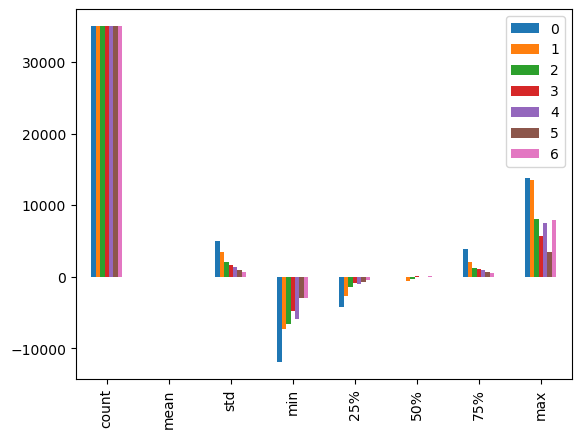

In [12]:
ECE_desc.plot(kind= 'bar')

**Observation**
- The Data has a total of 35040 entries with 7 columns. 
- Its ranges are from 2014-12-31 to 2018-12-31 
- The columns are not named, but are represented as numbers from 0 to 6. 
- The mean of all columns is very close to zero, which indicates that the data is centered around zero. 
- The standard deviation of the columns varies from 718 to 5010, which means that the data has different scales in different columns.
- The summary of the DataFrame shows that all columns have a count of 35040, which means that there are no missing values in the dataset. 


<Axes: >

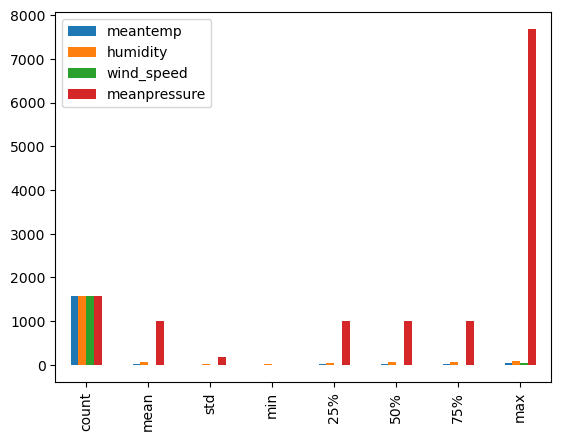

In [13]:
DC_desc.plot(kind= 'bar')

##  Check Time series is stationery or not 
-----------
-------------

### ECE Datasets
---------------
-------------

Check Stationary for 0


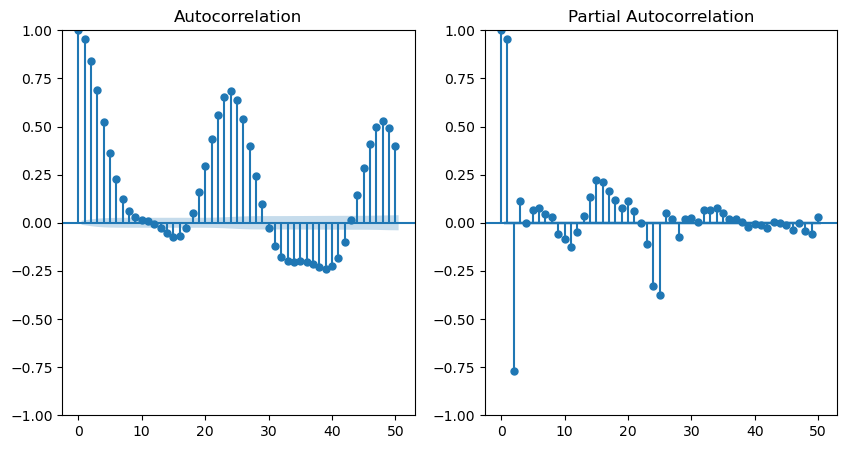

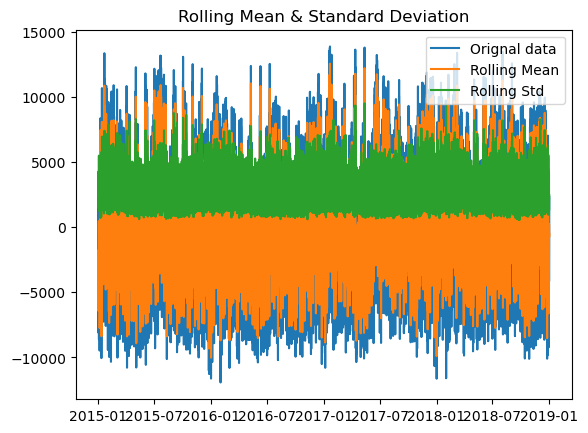

Reject Null Hypothesis and The time series is  stationery
--------------------------------------------------
Check Stationary for 1


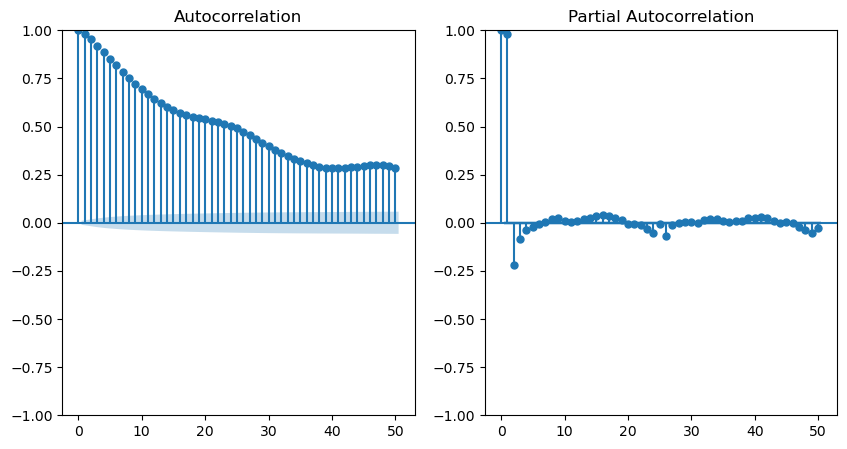

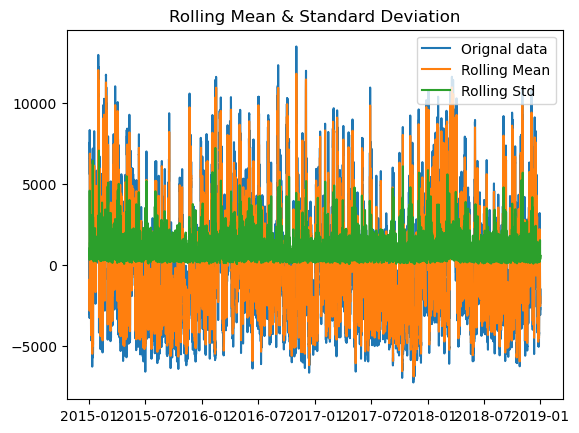

Reject Null Hypothesis and The time series is  stationery
--------------------------------------------------
Check Stationary for 2


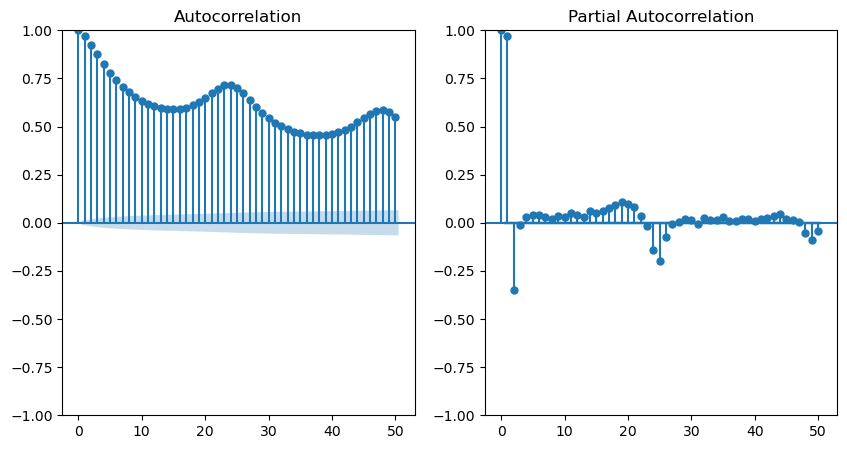

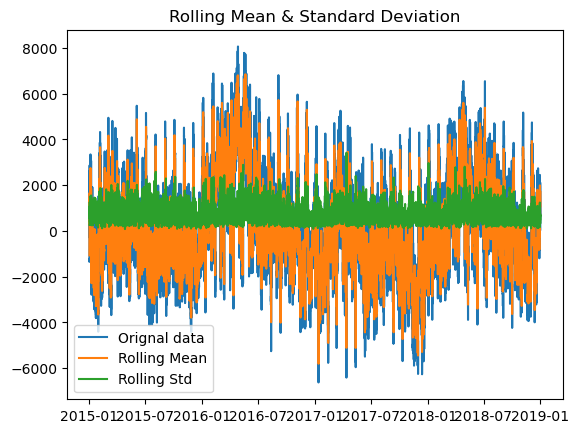

Reject Null Hypothesis and The time series is  stationery
Check Stationary for 3
--------------------------------------------------


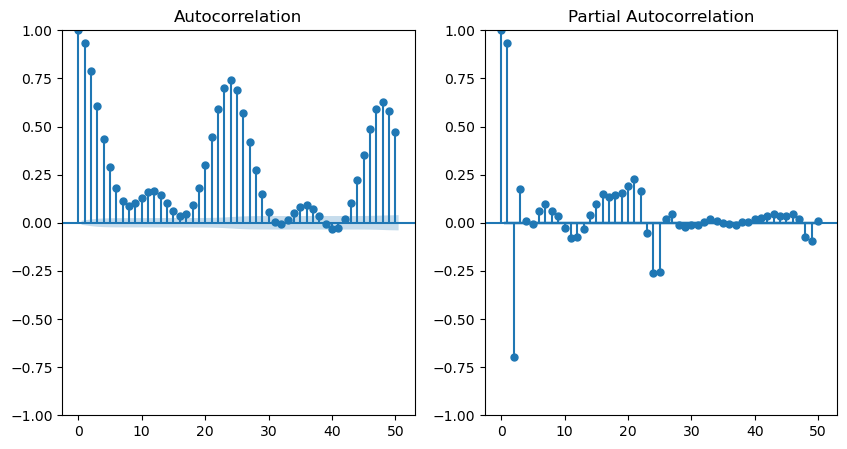

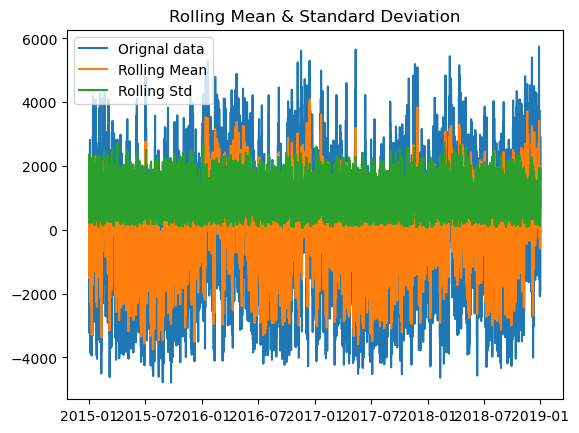

Reject Null Hypothesis and The time series is  stationery
Check Stationary for 4
--------------------------------------------------


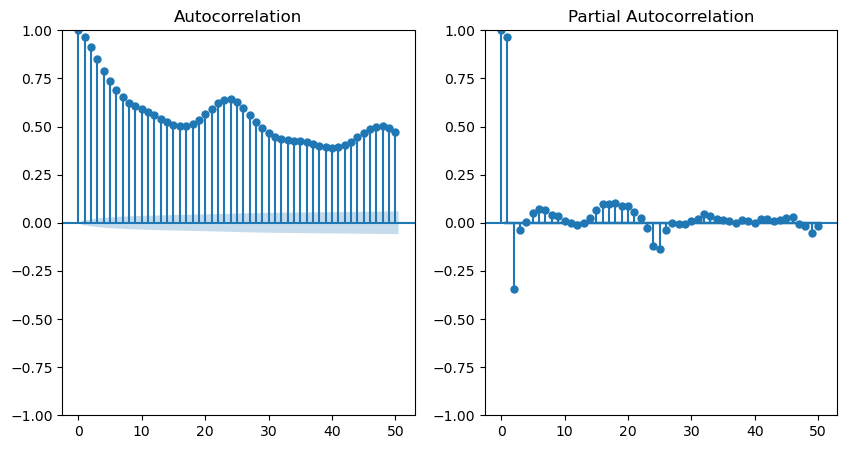

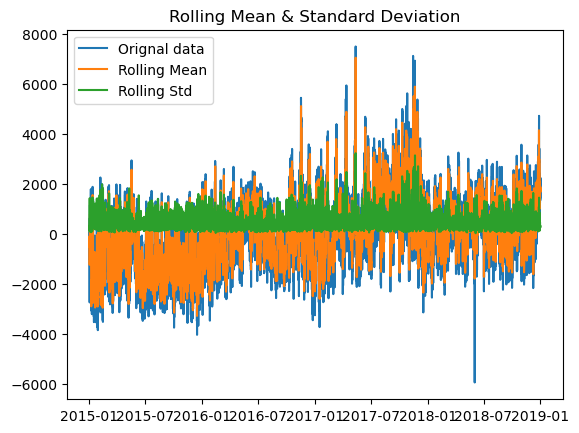

Reject Null Hypothesis and The time series is  stationery
Check Stationary for 5
--------------------------------------------------


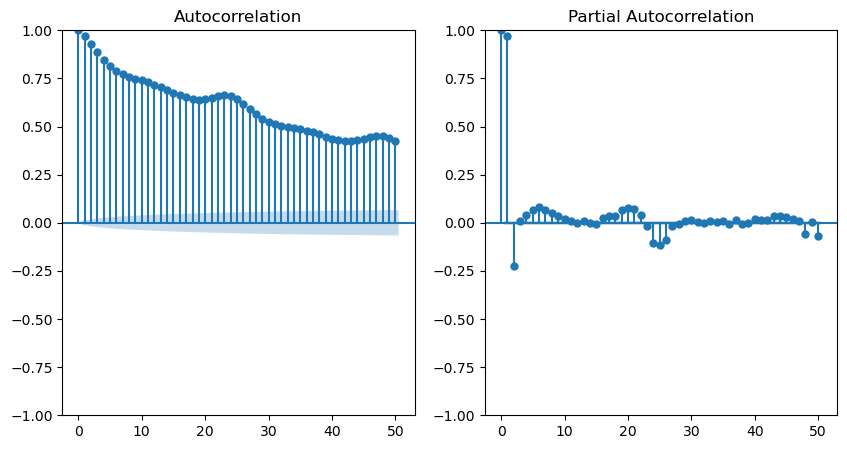

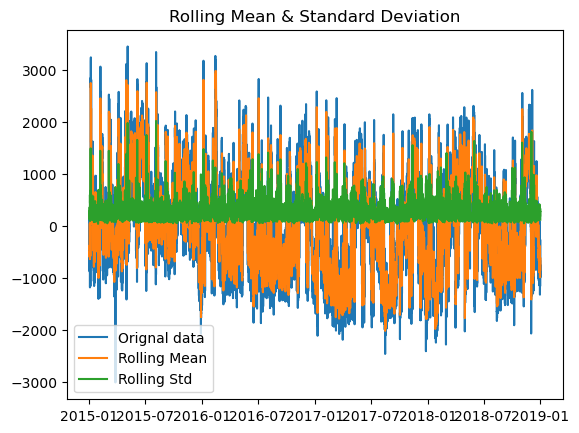

Reject Null Hypothesis and The time series is  stationery
Check Stationary for 6
--------------------------------------------------


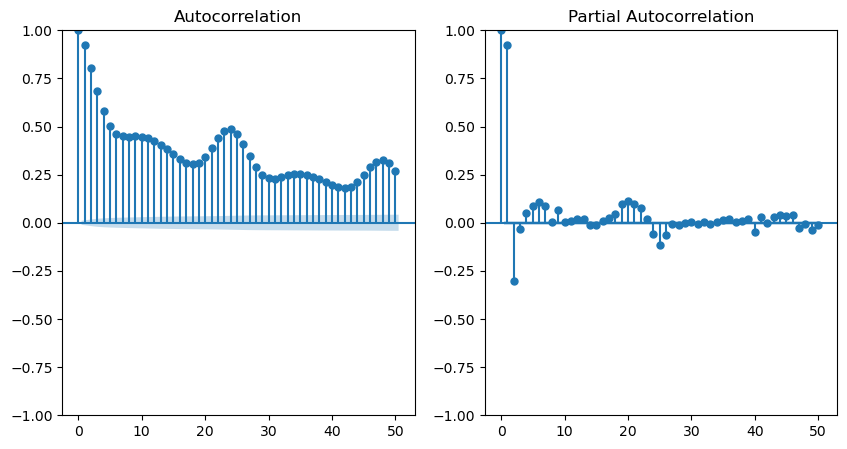

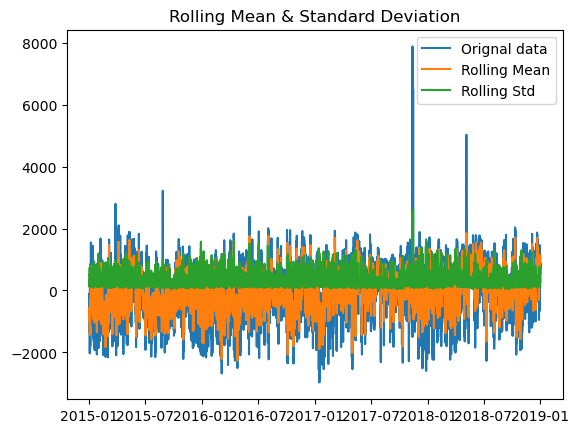

Reject Null Hypothesis and The time series is  stationery


In [32]:
data = ECE
print("Check Stationary for {}".format(data.columns[0]) )
EDA(data).check_stationery(50 ,  data.columns[0] , 12)
print("-"*50)
print("Check Stationary for {}".format(data.columns[1]))
EDA(data).check_stationery(50 ,  data.columns[1] , 12)
print("-"*50)
print("Check Stationary for {}".format(data.columns[2]))
EDA(data).check_stationery(50 ,  data.columns[2] , 12)
print("Check Stationary for {}".format(data.columns[3]))
print("-"*50)
EDA(data).check_stationery(50 ,  data.columns[3] , 12)
print("Check Stationary for {}".format(data.columns[4]))
print("-"*50)
EDA(data).check_stationery(50 ,  data.columns[4] , 12)
print("Check Stationary for {}".format(data.columns[5]) )
print("-"*50)
EDA(data).check_stationery(50 ,  data.columns[5] , 12)
print("Check Stationary for {}".format(data.columns[6]))
print("-"*50)
EDA(data).check_stationery(50 ,  data.columns[6] , 12)

### ETTH1 Dataset
--------------
-------------

Check Stationary for HUFL


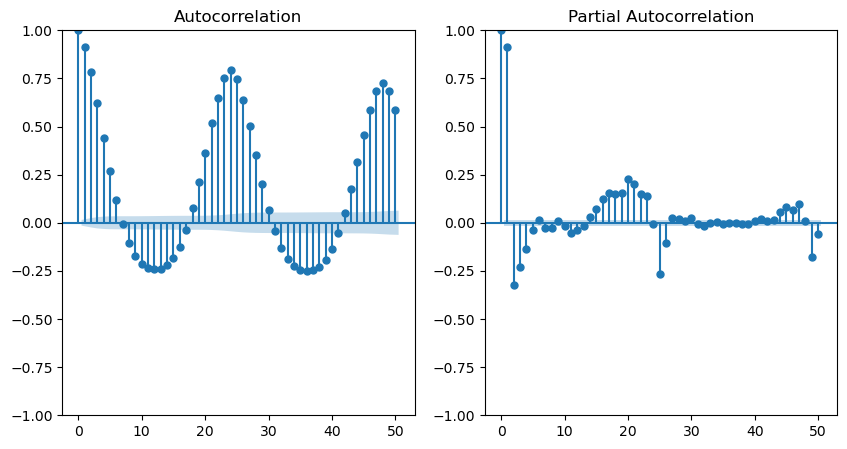

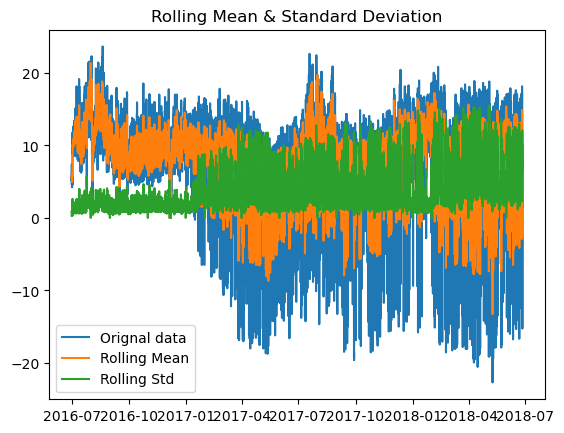

Reject Null Hypothesis and The time series is  stationery
--------------------------------------------------
Check Stationary for HULL


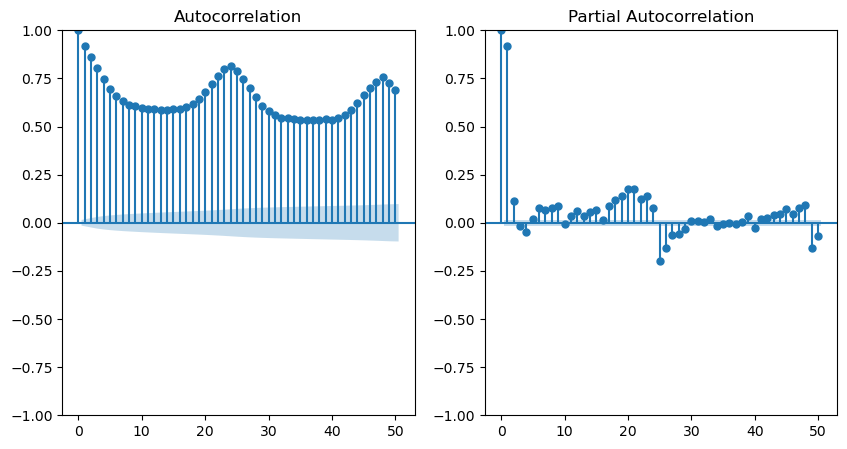

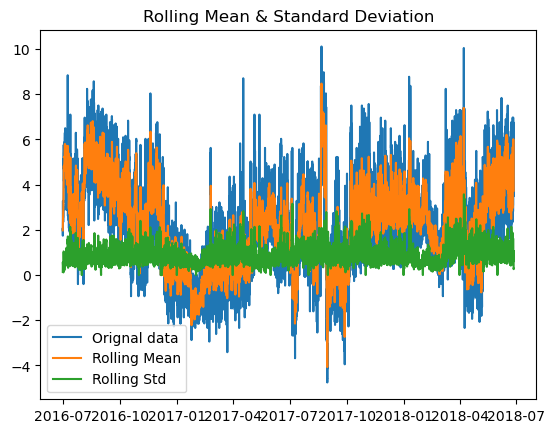

Reject Null Hypothesis and The time series is  stationery
--------------------------------------------------
Check Stationary for MUFL


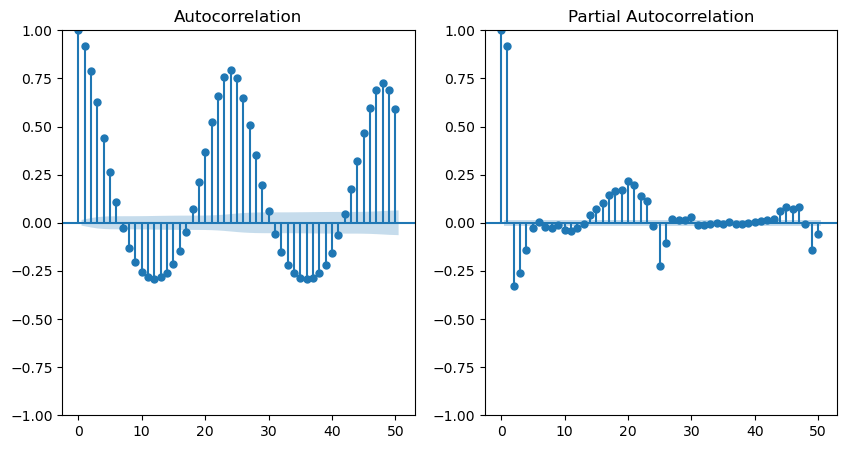

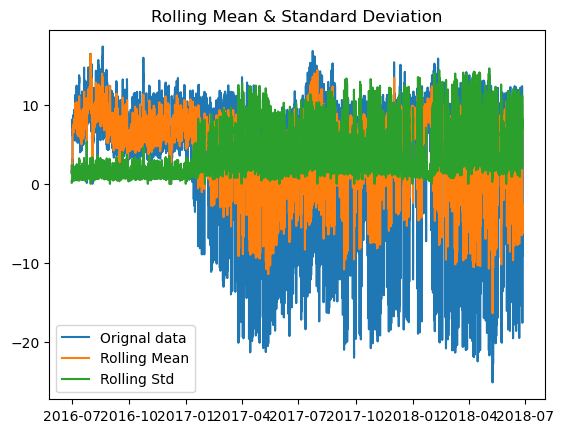

Reject Null Hypothesis and The time series is  stationery
Check Stationary for MULL
--------------------------------------------------


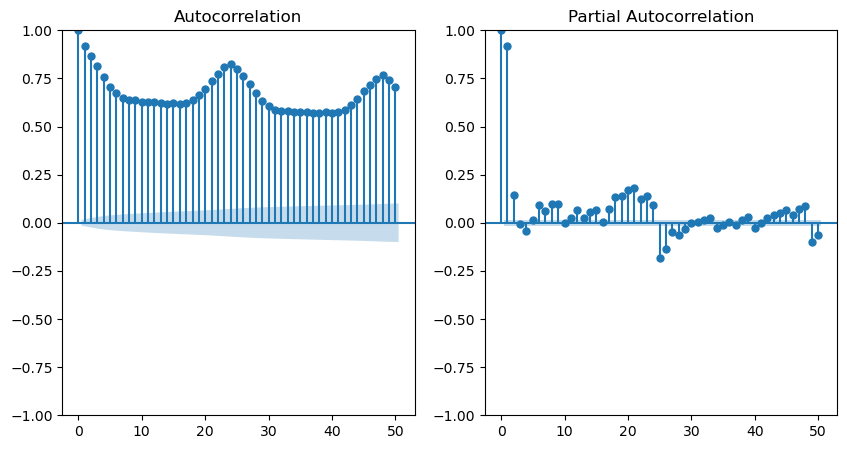

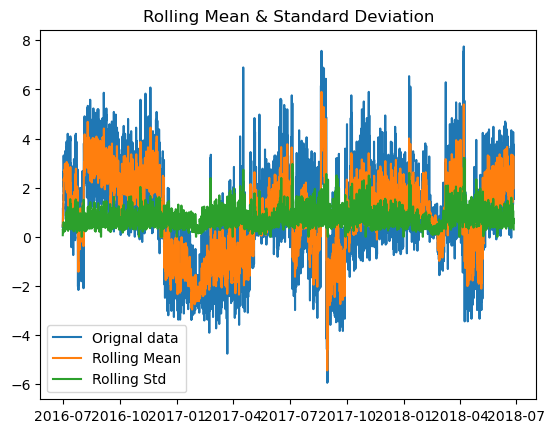

Reject Null Hypothesis and The time series is  stationery
Check Stationary for LUFL
--------------------------------------------------


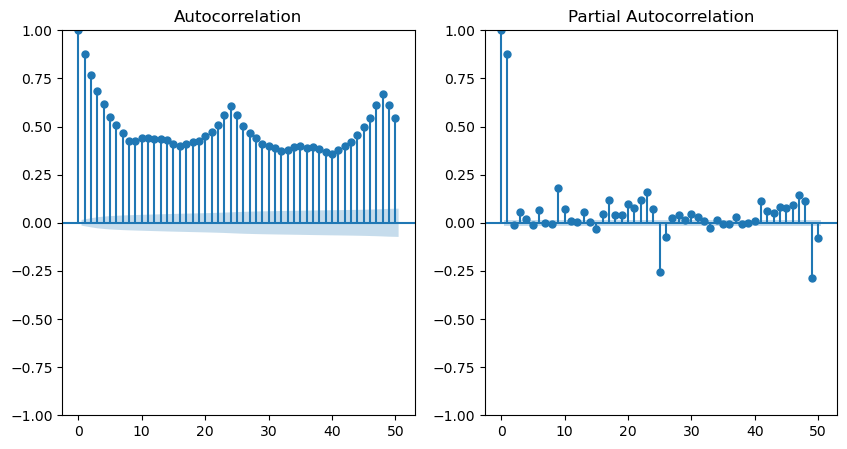

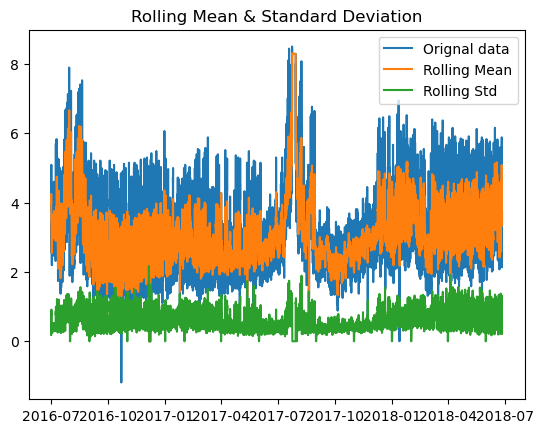

Reject Null Hypothesis and The time series is  stationery
Check Stationary for LULL
--------------------------------------------------


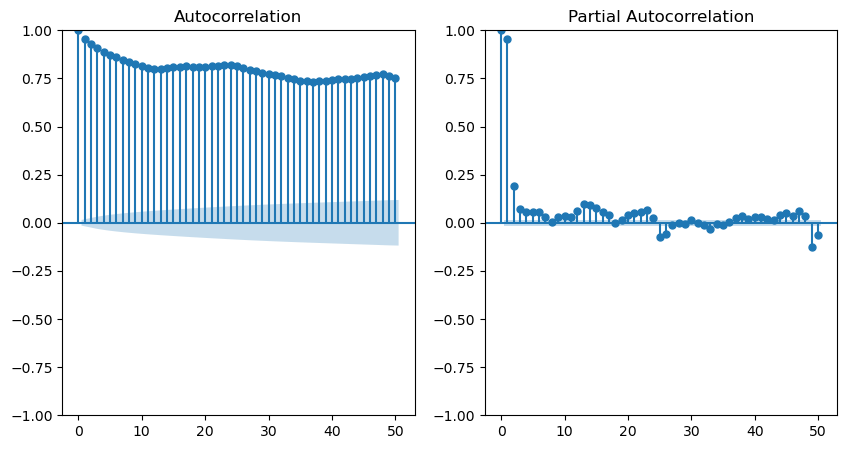

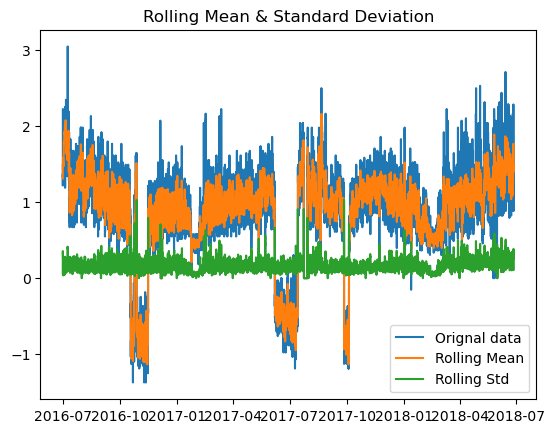

Reject Null Hypothesis and The time series is  stationery
Check Stationary for OT
--------------------------------------------------


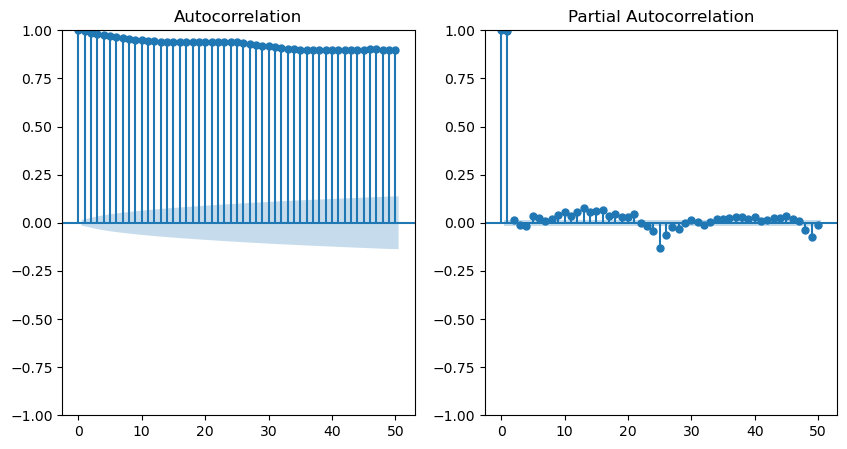

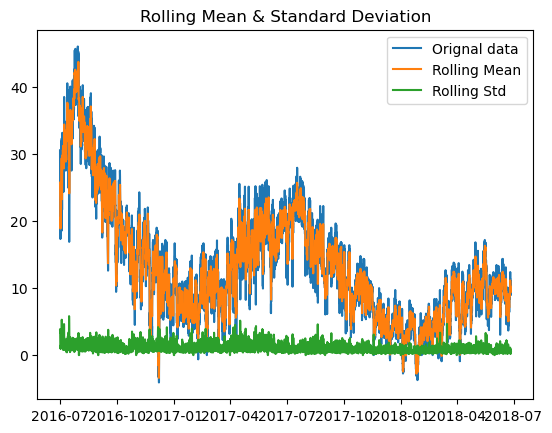

Reject Null Hypothesis and The time series is  stationery


In [29]:
data = ETTH1
print("Check Stationary for {}".format(data.columns[0]) )
EDA(data).check_stationery(50 ,  data.columns[0] , 12)
print("-"*50)
print("Check Stationary for {}".format(data.columns[1]))
EDA(data).check_stationery(50 ,  data.columns[1] , 12)
print("-"*50)
print("Check Stationary for {}".format(data.columns[2]))
EDA(data).check_stationery(50 ,  data.columns[2] , 12)
print("Check Stationary for {}".format(data.columns[3]))
print("-"*50)
EDA(data).check_stationery(50 ,  data.columns[3] , 12)
print("Check Stationary for {}".format(data.columns[4]))
print("-"*50)
EDA(data).check_stationery(50 ,  data.columns[4] , 12)
print("Check Stationary for {}".format(data.columns[5]) )
print("-"*50)
EDA(data).check_stationery(50 ,  data.columns[5] , 12)
print("Check Stationary for {}".format(data.columns[6]))
print("-"*50)
EDA(data).check_stationery(50 ,  data.columns[6] , 12)

### ETTH2 Dataset
-----------
----------

Check Stationary for HUFL


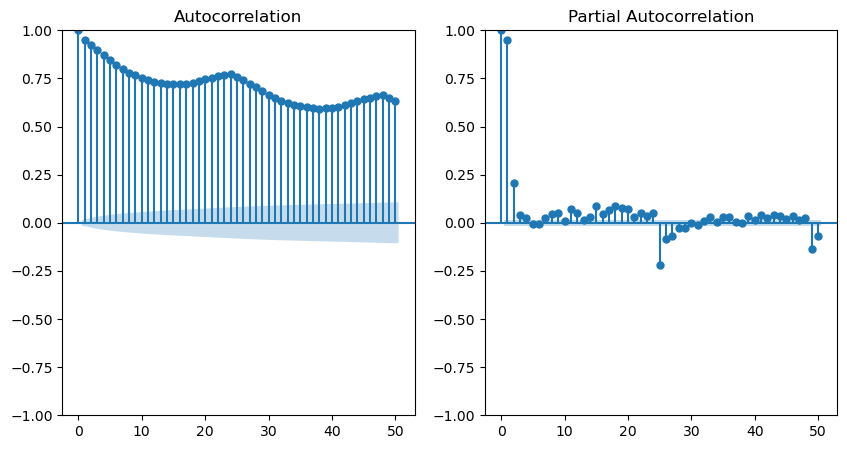

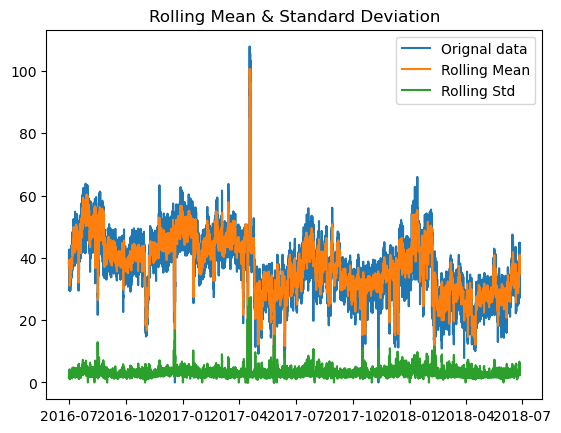

Reject Null Hypothesis and The time series is  stationery
--------------------------------------------------
Check Stationary for HULL


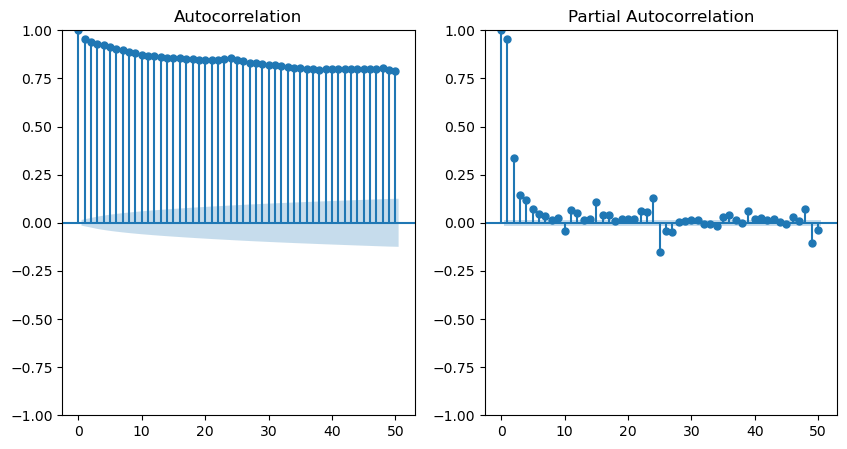

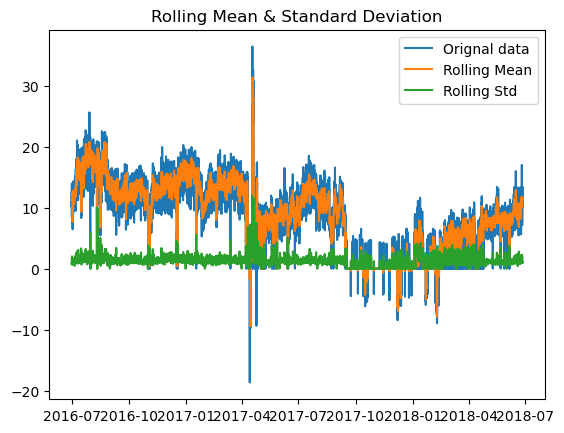

Reject Null Hypothesis and The time series is  stationery
--------------------------------------------------
Check Stationary for MUFL


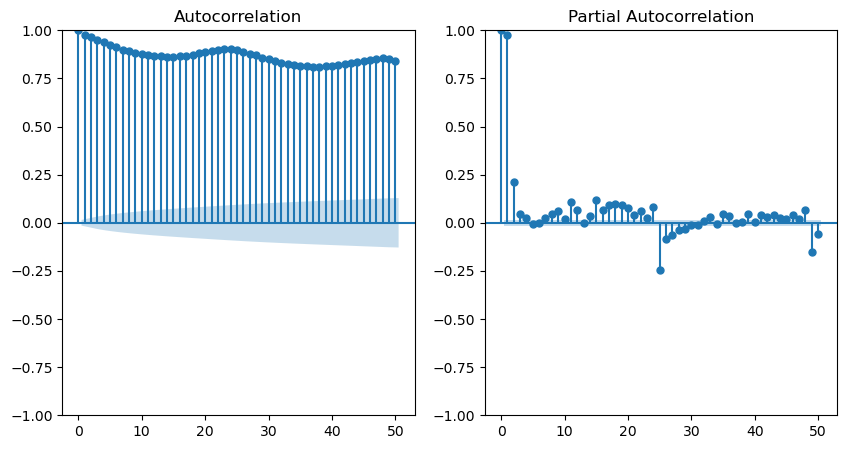

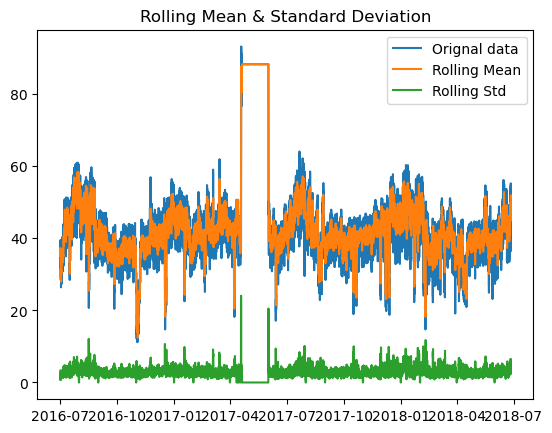

Reject Null Hypothesis and The time series is  stationery
Check Stationary for MULL
--------------------------------------------------


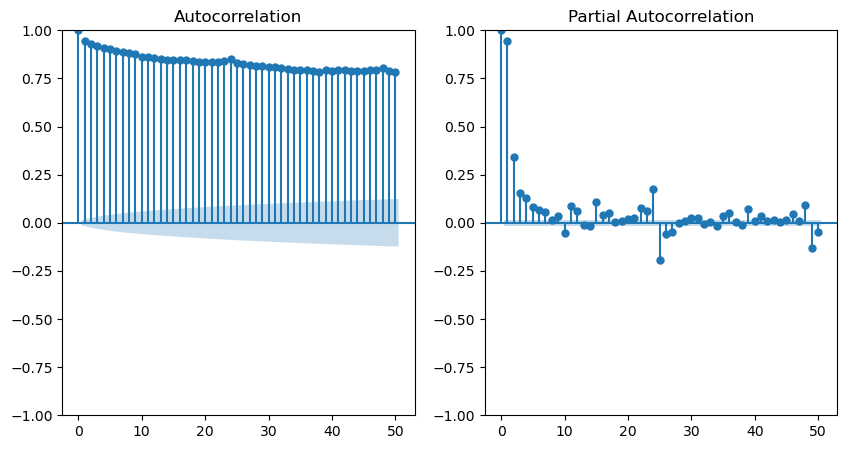

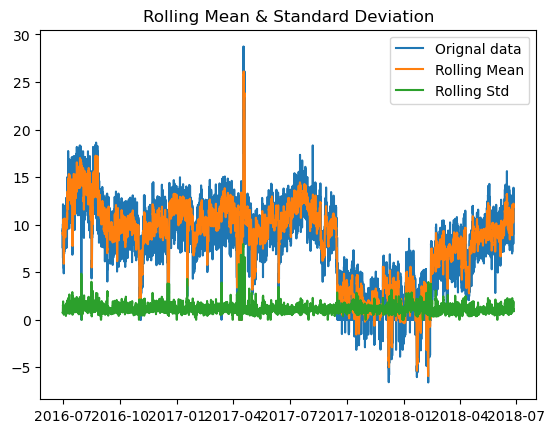

Reject Null Hypothesis and The time series is  stationery
Check Stationary for LUFL
--------------------------------------------------


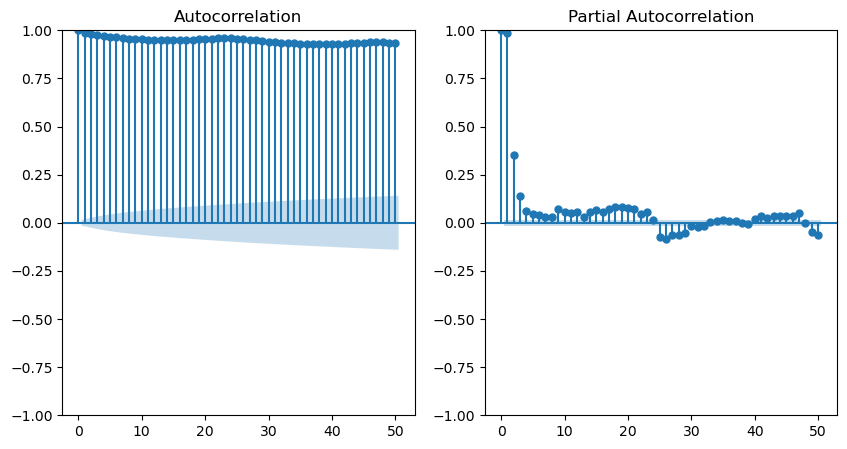

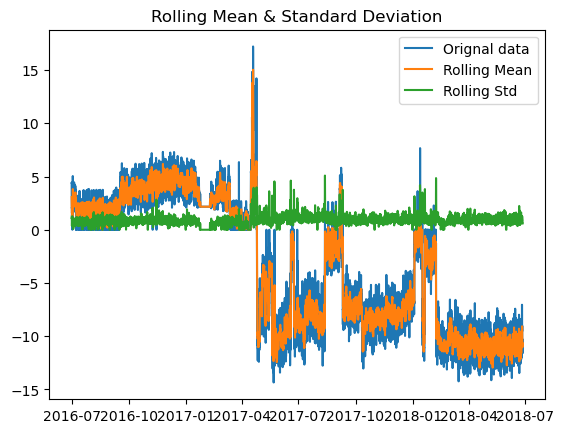

We cann't reject null hypothesis and The time series is non stationery
Check Stationary for LULL
--------------------------------------------------


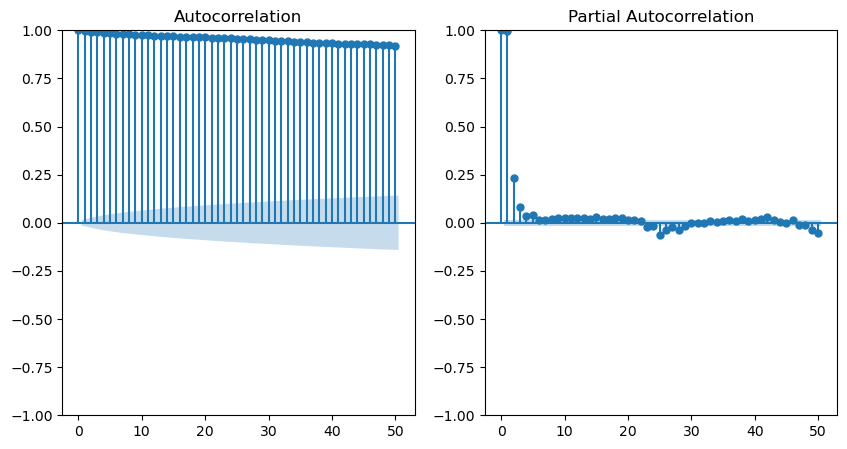

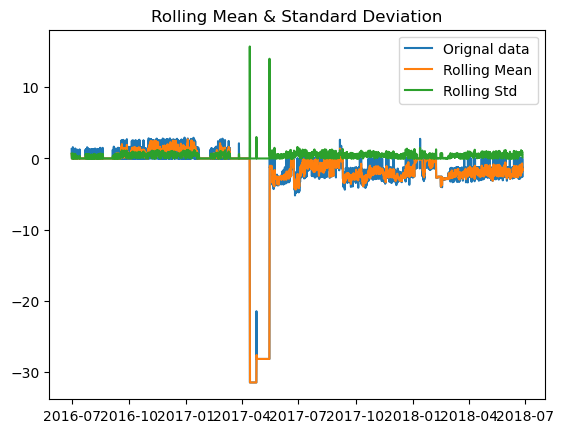

Reject Null Hypothesis and The time series is  stationery
Check Stationary for OT
--------------------------------------------------


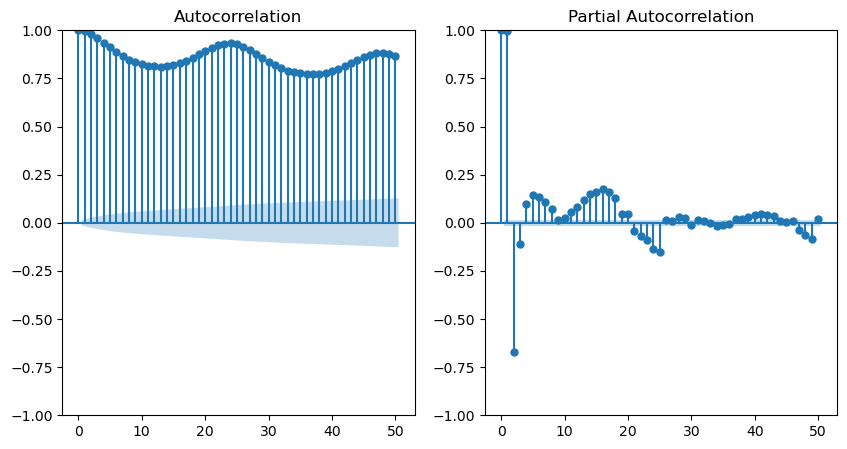

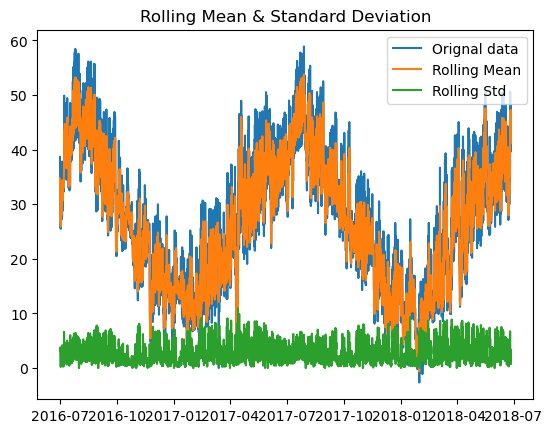

Reject Null Hypothesis and The time series is  stationery


In [30]:
data = ETTH2
print("Check Stationary for {}".format(data.columns[0]) )
EDA(data).check_stationery(50 ,  data.columns[0] , 12)
print("-"*50)
print("Check Stationary for {}".format(data.columns[1]))
EDA(data).check_stationery(50 ,  data.columns[1] , 12)
print("-"*50)
print("Check Stationary for {}".format(data.columns[2]))
EDA(data).check_stationery(50 ,  data.columns[2] , 12)
print("Check Stationary for {}".format(data.columns[3]))
print("-"*50)
EDA(data).check_stationery(50 ,  data.columns[3] , 12)
print("Check Stationary for {}".format(data.columns[4]))
print("-"*50)
EDA(data).check_stationery(50 ,  data.columns[4] , 12)
print("Check Stationary for {}".format(data.columns[5]) )
print("-"*50)
EDA(data).check_stationery(50 ,  data.columns[5] , 12)
print("Check Stationary for {}".format(data.columns[6]))
print("-"*50)
EDA(data).check_stationery(50 ,  data.columns[6] , 12)

### ETTM1 Dataset
------------
-------------

Check Stationary for HUFL


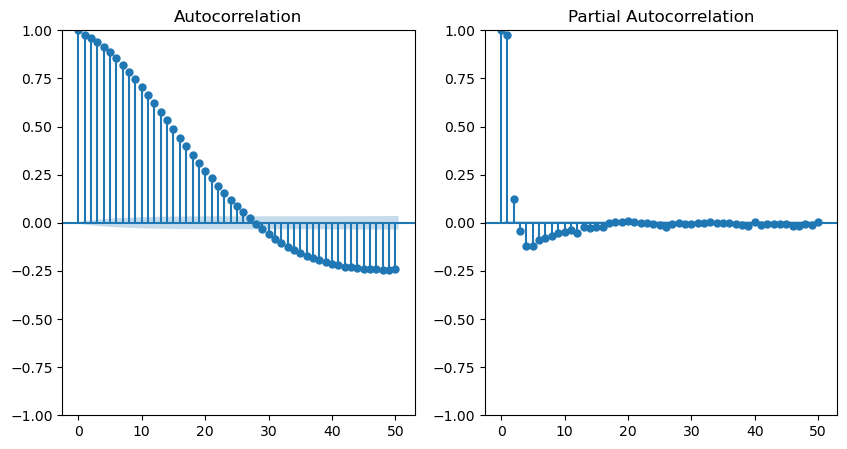

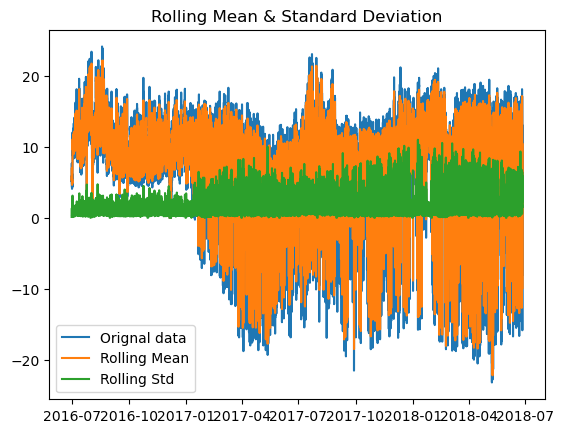

Reject Null Hypothesis and The time series is  stationery
--------------------------------------------------
Check Stationary for HULL


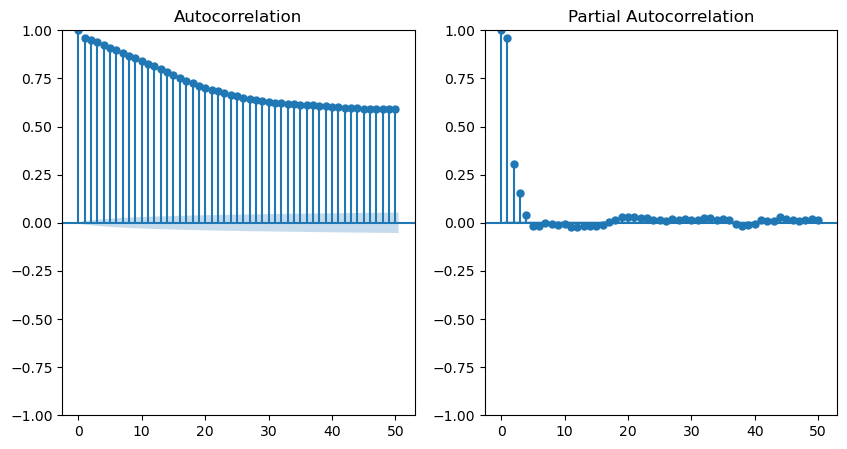

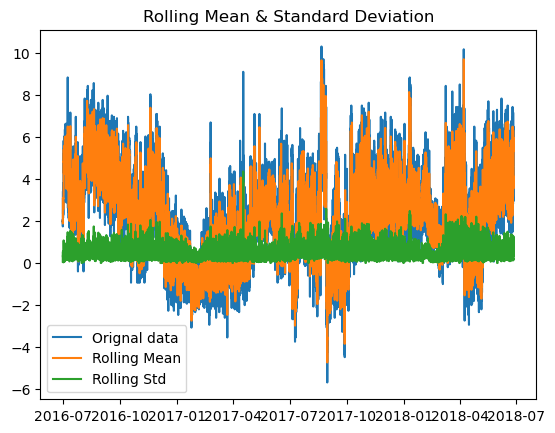

Reject Null Hypothesis and The time series is  stationery
--------------------------------------------------
Check Stationary for MUFL


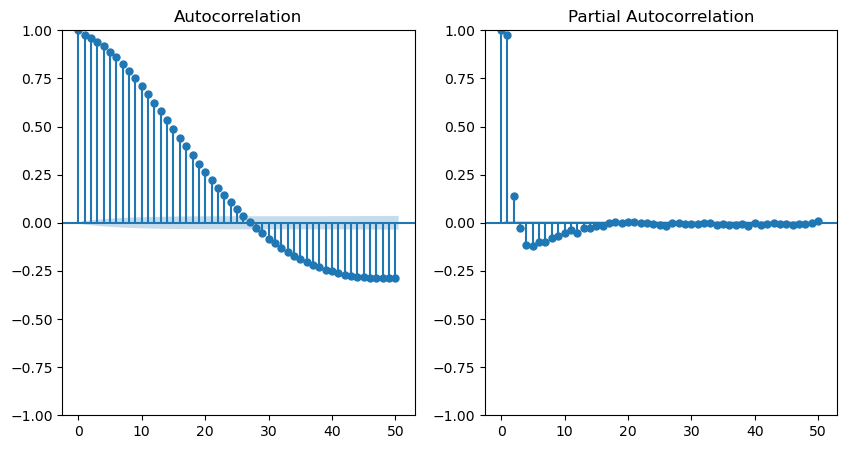

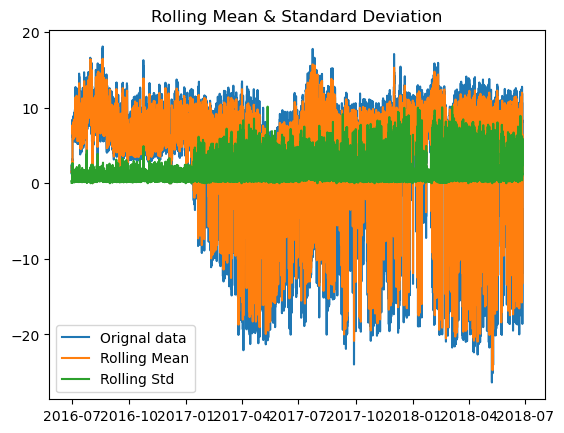

Reject Null Hypothesis and The time series is  stationery
Check Stationary for MULL
--------------------------------------------------


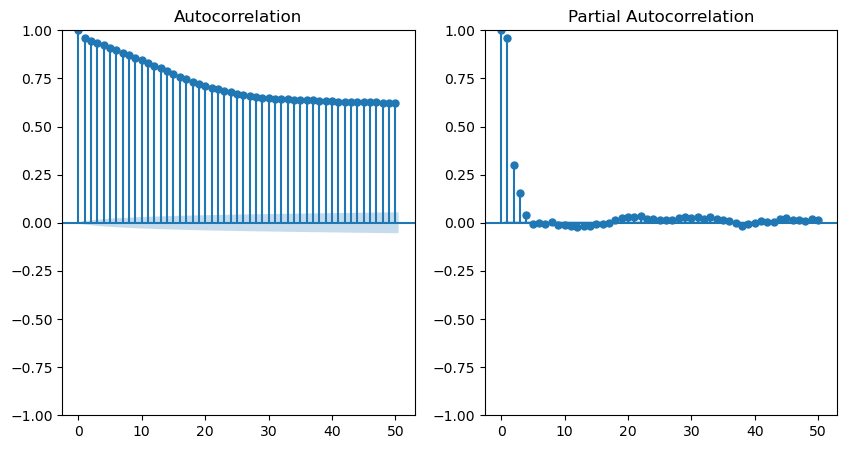

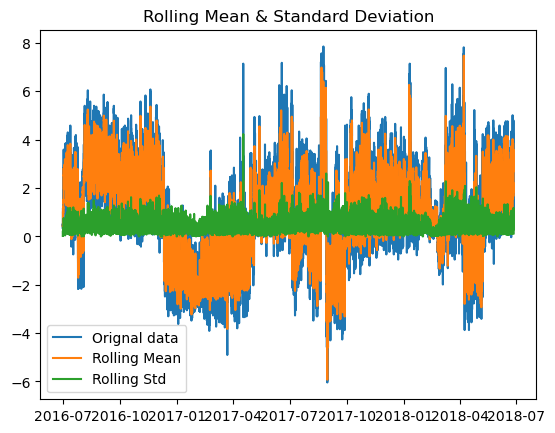

Reject Null Hypothesis and The time series is  stationery
Check Stationary for LUFL
--------------------------------------------------


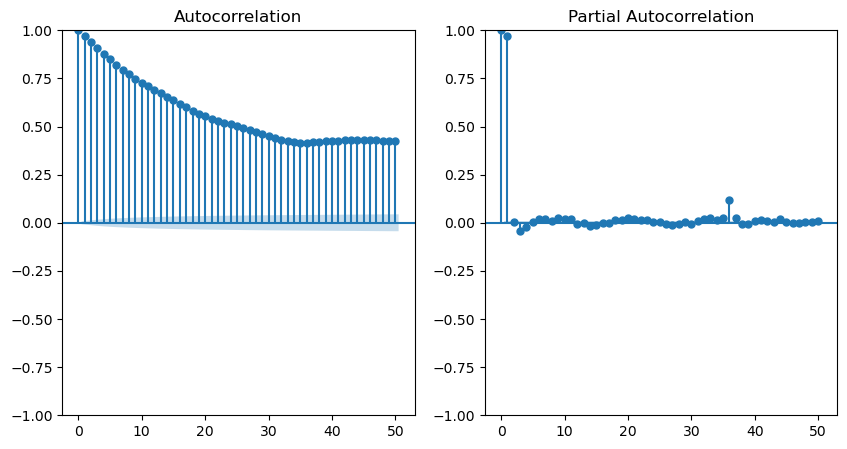

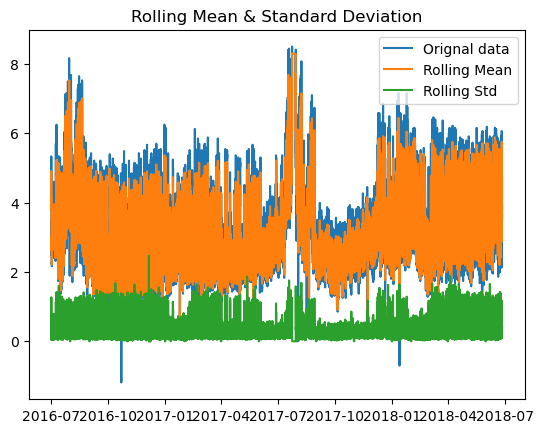

Reject Null Hypothesis and The time series is  stationery
Check Stationary for LULL
--------------------------------------------------


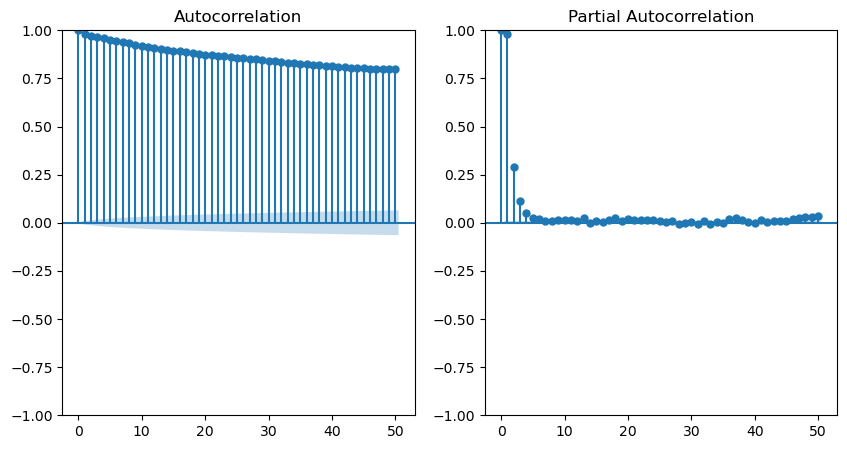

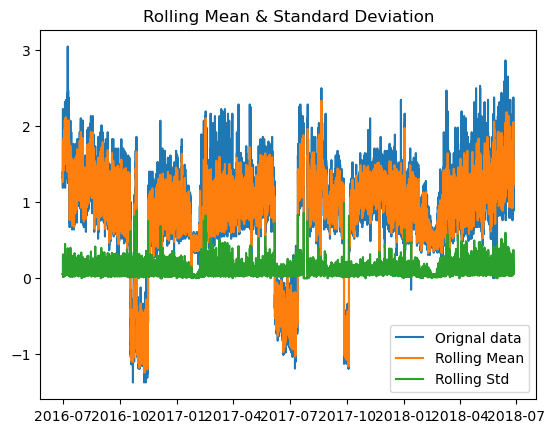

Reject Null Hypothesis and The time series is  stationery
Check Stationary for OT
--------------------------------------------------


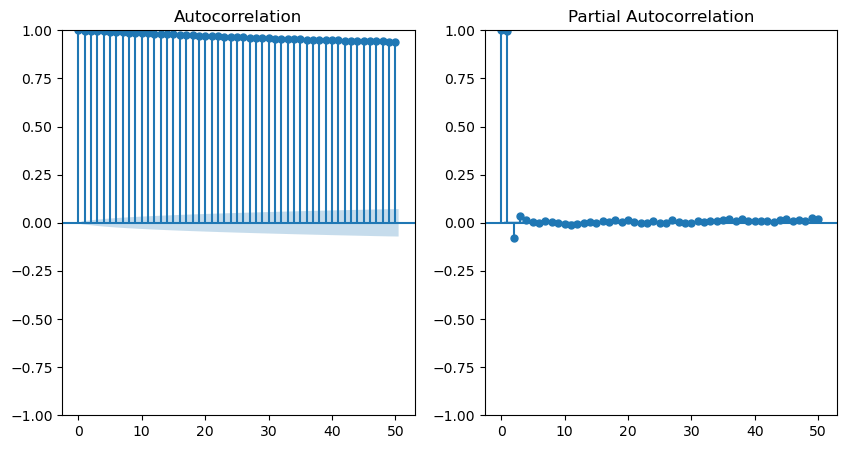

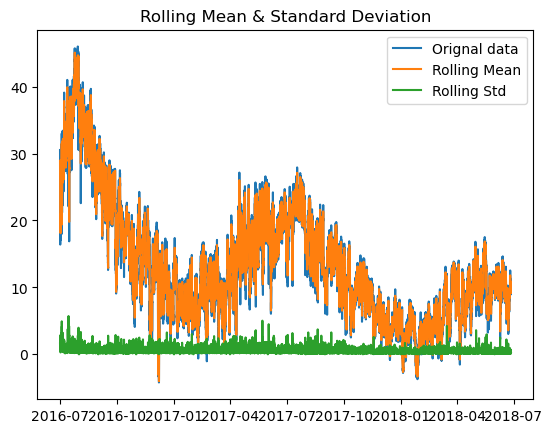

Reject Null Hypothesis and The time series is  stationery


In [31]:
data = ETTM1
print("Check Stationary for {}".format(data.columns[0]) )
EDA(data).check_stationery(50 ,  data.columns[0] , 12)
print("-"*50)
print("Check Stationary for {}".format(data.columns[1]))
EDA(data).check_stationery(50 ,  data.columns[1] , 12)
print("-"*50)
print("Check Stationary for {}".format(data.columns[2]))
EDA(data).check_stationery(50 ,  data.columns[2] , 12)
print("Check Stationary for {}".format(data.columns[3]))
print("-"*50)
EDA(data).check_stationery(50 ,  data.columns[3] , 12)
print("Check Stationary for {}".format(data.columns[4]))
print("-"*50)
EDA(data).check_stationery(50 ,  data.columns[4] , 12)
print("Check Stationary for {}".format(data.columns[5]) )
print("-"*50)
EDA(data).check_stationery(50 ,  data.columns[5] , 12)
print("Check Stationary for {}".format(data.columns[6]))
print("-"*50)
EDA(data).check_stationery(50 ,  data.columns[6] , 12)

## Extract Seson

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import rcParams
ECE.sort_index(inplace=True)
# Plot
rcParams["figure.figsize"] = 16, 14
ts_decomposition = seasonal_decompose(x = ECE['0'].iloc[:5*356] ,  period=1)
trend_estimate = ts_decomposition.trend
seasonal_estimate = ts_decomposition.seasonal
residual_estimate = ts_decomposition.resid


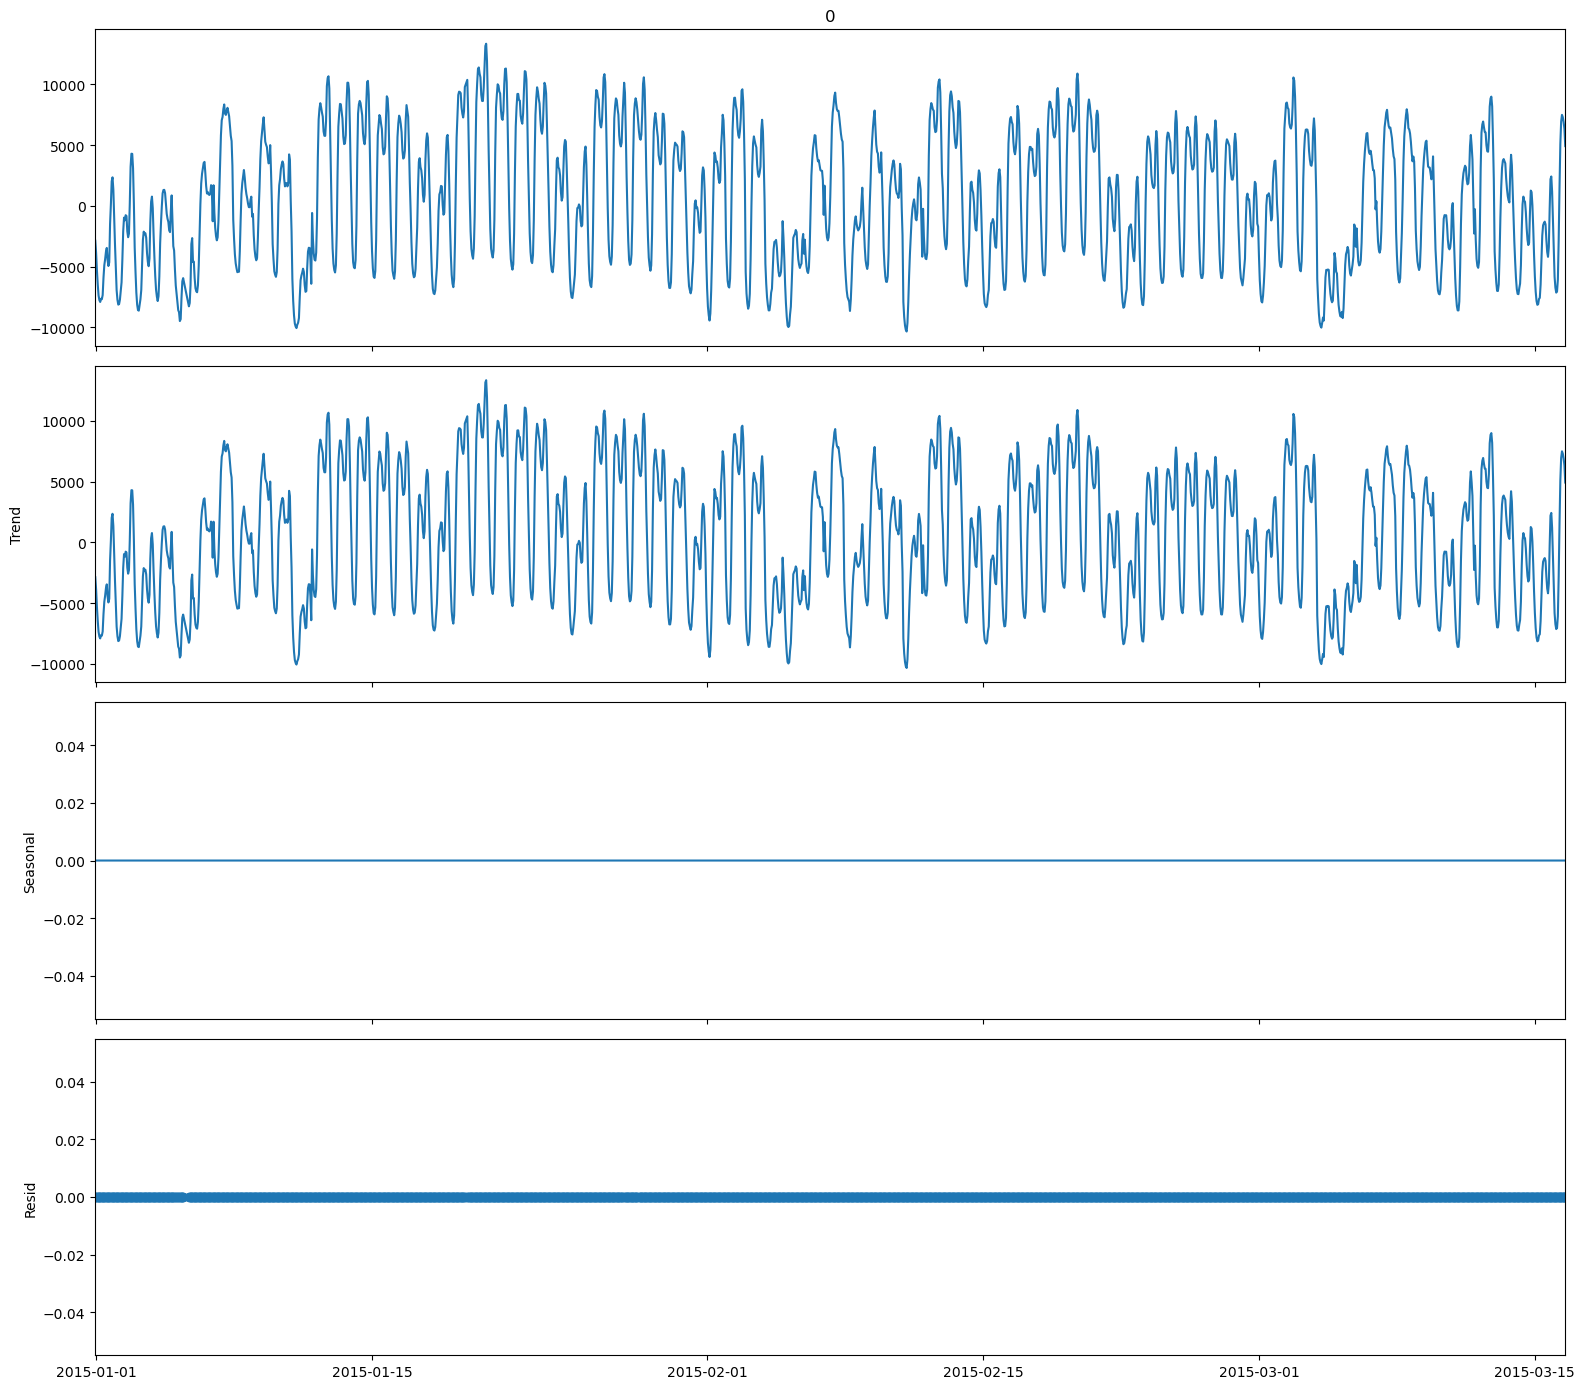

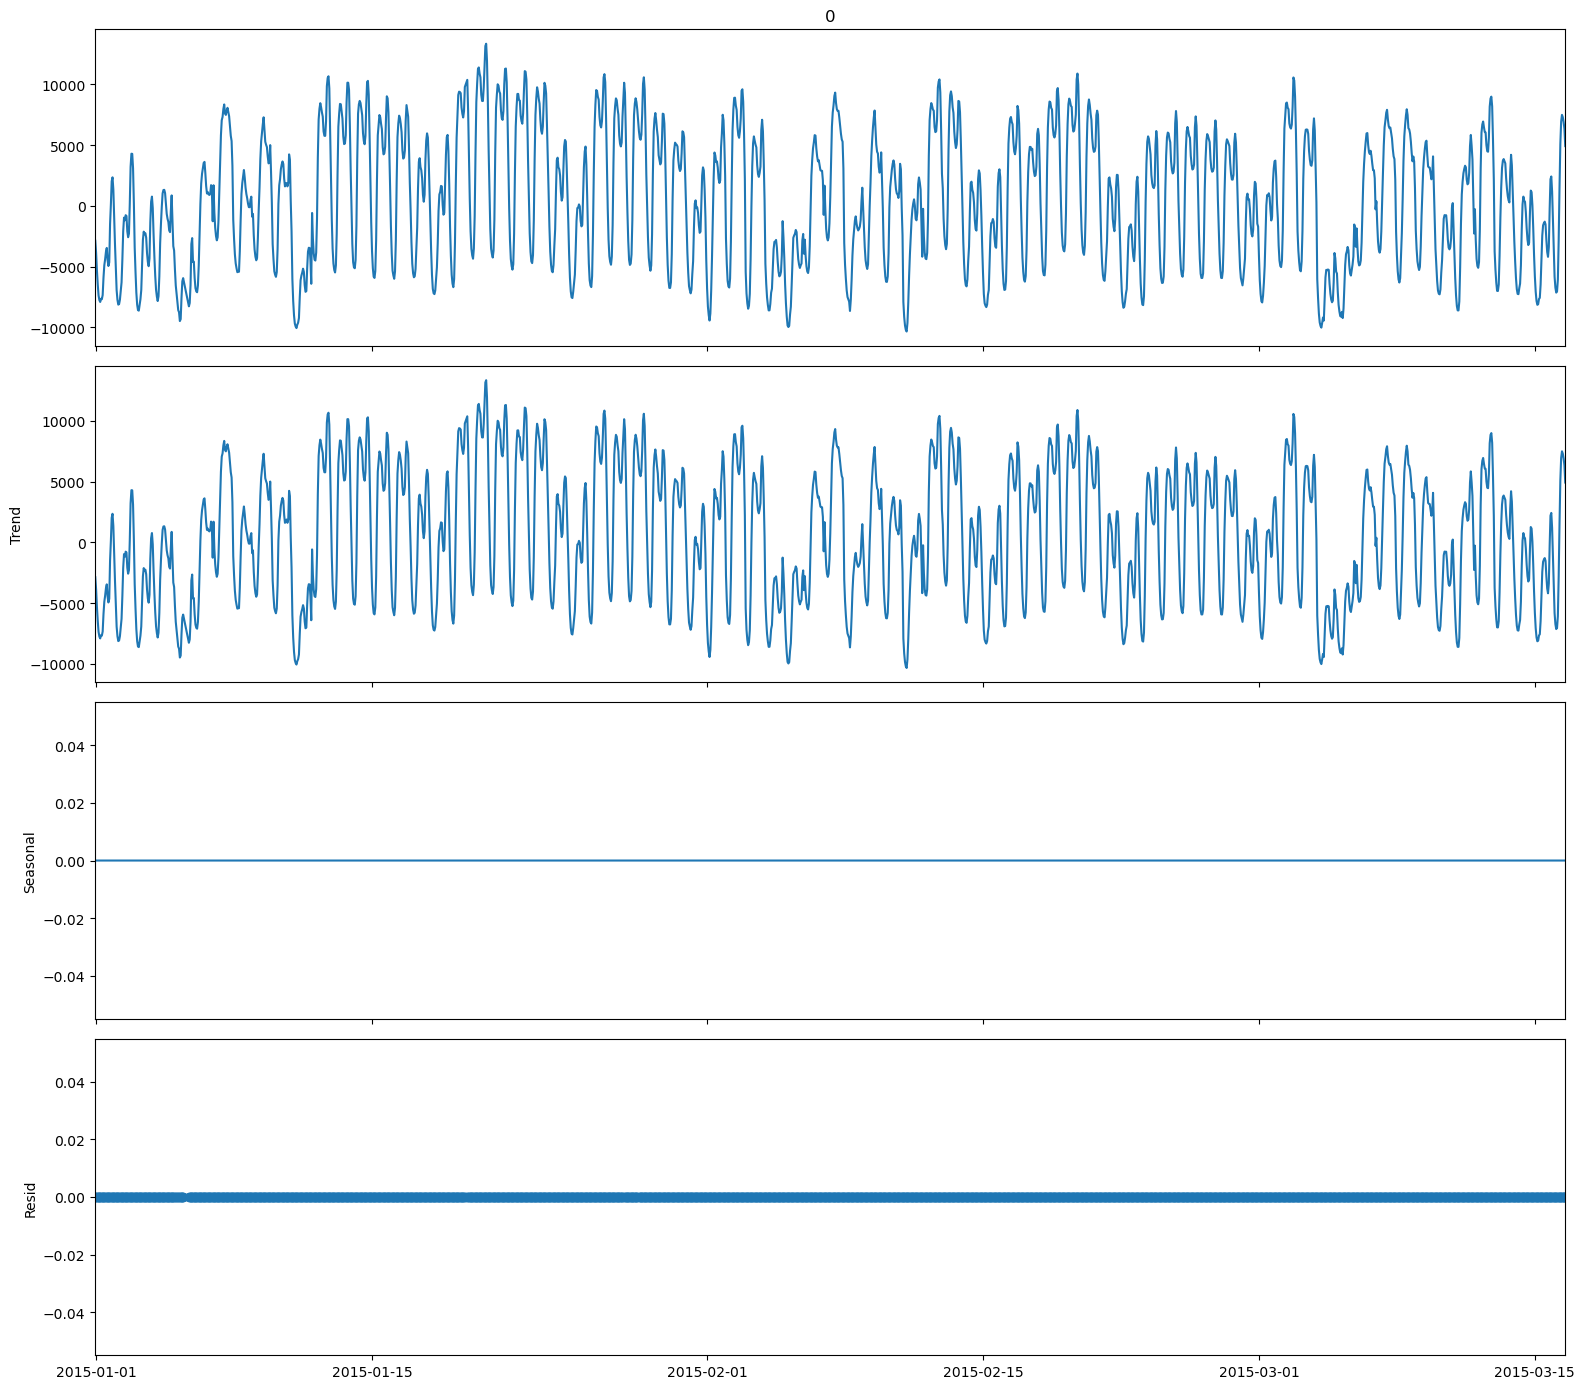

In [57]:
ts_decomposition.plot()

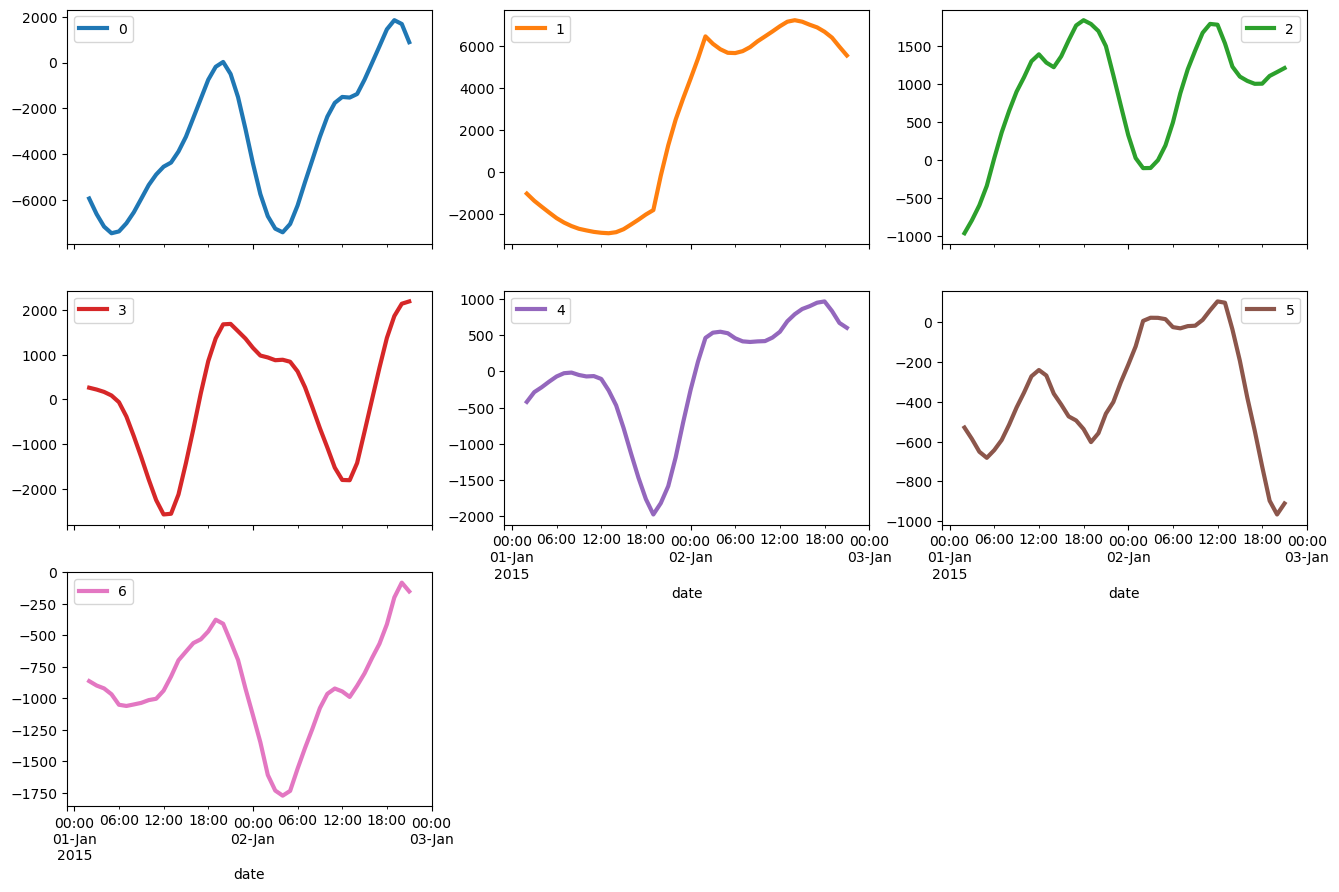

In [68]:
trend_dict = {}
import statsmodels.api as sm
for ts in ECE.columns:
    decomposition = sm.tsa.seasonal_decompose(ECE[ts][:50] , period= 7)
    # Store back the results
    trend_dict[ts] = decomposition.trend

pd.DataFrame(trend_dict).plot(subplots=True, layout=(4, 3), linewidth=3);

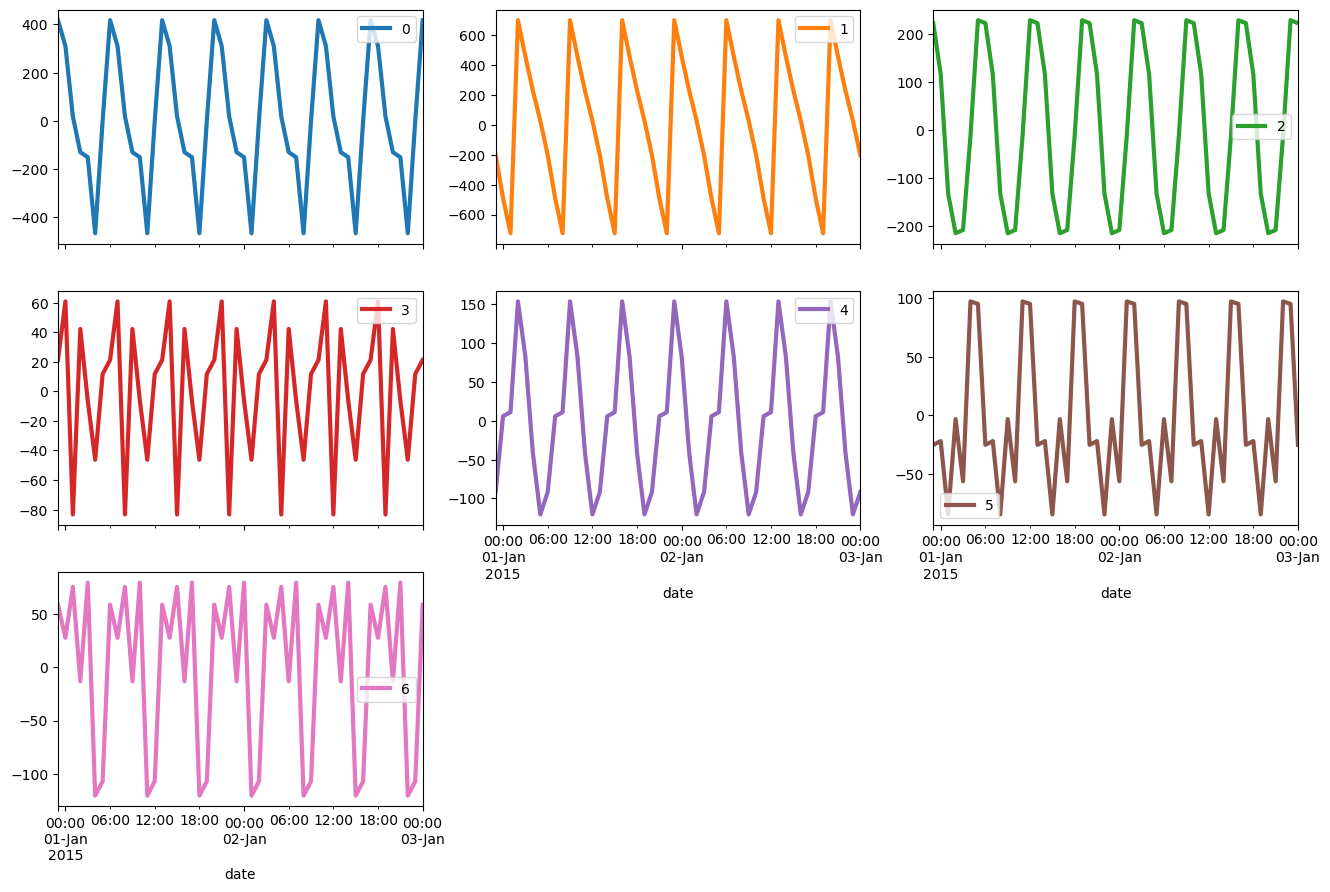

In [67]:
trend_dict = {}
import statsmodels.api as sm
for ts in ECE.columns:
    decomposition = sm.tsa.seasonal_decompose(ECE[ts][:50] , period= 7)
    # Store back the results
    trend_dict[ts] = decomposition.seasonal

pd.DataFrame(trend_dict).plot(subplots=True, layout=(4, 3), linewidth=3);